
# <font size="+1">**Table de matières**</font>




<font size="+3"><span style='color:#26467a'> **P4 - Anticipez les besoins en consommation de bâtiments** </span></font>


![SeattleLogo](img/Seattle_logo.png)


Ce Notebook s'intègre dans le projet d'analyse de la consommation et des émissions des bâtiments non destinés à l’habitation dans la ville de Seattle.

Il comprend la **modélisation des émissions de CO2 des bâtiments non destinés à l'habitation**.

Le jeu de données uilisé correspond à la sauvegarde du jeu de données nettoyé et transformé lors de la première phase de nettoyage.<br> (*SanchezPellicer_Raquel_1_notebook_exploratoire_012023.ipynb*)




[Librairies utilisées](#CHARGEMENT_LIBRAIRIES)<br>

[Fontcions utilisées dans ce notebook](#FONCTIONS_UTILISÉES)<br>

---

[**Description du jeux de données**](#fichier_données)

[**Pre-processing**](#pre_processing)
 * [Stratification des données](#data_stratification)
 * [Découpage données entrainement et test](#trainSet_testSet)  
 * [Matrice X et vecteur y](#MatriceX_vecteury)   
 * [Encodage des variables catégorielles](#scaling_variables_categorielles)  
 * [Feature scaling](#feature_scaling)<br>

[**Test de differents algorithmes de Machine Learning**](#Test_algo_ML)
 * [Baseline : Approches de régression naïves](#baseline)
 * [Modèles lineaires](#Model_linear)
   * [Régression linéaire no régularisée](#reg_lineaire_nonRegul)
   * [Régression linéaire RIDGE](#reg_lineaire_RIDGE)
   * [Régression linéaire LASSO](#reg_lineaire_LASSO)
   * [Régression linéaire Elastic Net](#reg_lineaire_ElasticNet)<br>   
 * [Modèles NON lineaires](#Model_NON_linear)
   * [SVR - Support Vector Regressor kernel non linéaire](#SVR)
   * [K-Neighbors Regressor](#KNR)
   * [Random Forest Regressor](#random_Forest)
   * [Ada Boost Regressor](#adaBoost)
   * [Gradient Boosting Regressor](#Gradient_Boosting)  
   * [Light Gradient Boosting Machine](#LightGBM)<br>
 * [Bilan des algorithmes testés](#bilan_algorithmes)<br>


[**Optimisation des algorithmes**](#opti_algo)
 * [Idéntification hyperparamètres](#id_hyperparamètres)
   * [Hyperparamètres Gradient Boosting Regressor](#Gradient_Boosting_hyperparam)
   * [Hyperparamètres Random Forest Regressor](#RF_hyperparam)
   * [Hyperparamètres Light Gradient Boosting Machine](#LightGBM_hyperparam)<br>
 * [Sélection du meilleur algorithme pour la estimation desEmissions de CO2 ](#selec_algo_co2)


[**Prédictions émissions CO2 du modèle final**](#pred_final_co2)
 * [Importance des variables pour la estimation des emissions de CO2](#features_importance_CO2)
 * [Erreurs de prédiction ](#pred_errors_Co2)
   * [Erreur maximale et minimale sur le jeu de test](#min_max_error)
   * [Erreur de prédiction des emissions de CO2 supérieur à celui du 99% des prédictions restantes](#erreur_sup99)
   * [Erreurs de prédiction de consomation d'énergie est supérieur à celui du 95% des prédictions restantes](#erreur_sup95)
   * [Erreurs de prédiction de consomation d'énergie est inférieur à celui du 95% des prédictions restantes](#erreur_inf5)
   * [Erreurs de prédiction de consomation d'énergie est inférieur à celui du 99% des prédictions restantes](#erreur_inf1)<br>
 * [Importance des variables associées aux erreurs plus/moins importants](#errors_feature_importance)
 
<br>

---
---





<a id='CHARGEMENT_LIBRAIRIES'></a>

---

---

<font size="+1"> **CHARGEMENT DES LIBRAIRIES** </font>

---

In [1]:

#-----------------------------
#Actuallisation des packages
#-----------------------------
#!pip install --upgrade pip


#General libraries
import os
import glob
import pandas as pd
import numpy as np
import random
import csv
from pprint import pprint
from functools import reduce

#Data preprocessing
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from category_encoders import TargetEncoder

# Modélisation
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn import tree
import lightgbm
from lightgbm import LGBMRegressor
import time

# Feature Importance
import shap
shap.initjs()
import lime
from lime import lime_tabular

# Data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
import plotly.express as px


# Warnings
import warnings
from warnings import simplefilter
#warnings.filterwarnings(action='once')
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ValueError)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)


'''
#-------------------------------------------------------------
#Vérification des numéros des versions des packages installés
#-------------------------------------------------------------
'''
print('Version des librairies utilisées : \n')


print('Pandas        : ' + pd.__version__)
print('NumPy         : ' + np.version.full_version)
print('Csv           : ' + csv.__version__ + '\n')

print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__+ '\n')

print('Sklearn        : ' + sklearn.__version__)
print('LightGBM        : ' + lightgbm.__version__)
print('Shap       : ' + shap.__version__+ '\n')


import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)


/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Version des librairies utilisées : 

Pandas        : 1.5.2
NumPy         : 1.23.5
Csv           : 1.0

Matplotlib    : 3.3.4
Seaborn       : 0.11.1

Sklearn        : 1.2.0
LightGBM        : 3.3.5
Shap       : 0.41.0

Lancé le      : 2023-02-14T09:19:32.031680



<a id='FONCTIONS_UTILISÉES'></a>


<br>


---
---

<font size="+1"> **FONCTIONS UTILISÉES DANS CE NOTEBOOK** </font>

---


In [2]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour la description des fichiers de données 
#-----------------------------------------------------------------------------

def compl_info (df):
    nb_row = df.index.size
    nb_col = df.columns.size
    Types = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    Null = pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}) 
    PercCount = pd.DataFrame(100-100*(df.isna().sum())/nb_row).T.rename(index={0:'Pourcentage remplissage'}) 
    infor = pd.concat ([Types,Null,PercCount], axis =0)
    return infor

In [3]:

#--------------------------------------------------------------
# ---Création des 'arrays of indices' pour les folds stratifiés
#--------------------------------------------------------------


def stratified_cv(X_train,strat_arg):
    
    """
    Iterable yielding (train, test) splits as arrays of indices
    
    ----------
    Paramètres
    ----------
    X_train : X_train_set à découper, obligatoire
    strat_arg : variable cible, obligatoire
    """
      
    split_cv = model_selection.StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=randomN)
    stratified_cv = []
    
    for i, (train_index_cv, test_index_cv) in enumerate(split_cv.split(X_train, strat_arg)):
        stratified_cv = zip(train_index_cv, test_index_cv)
    

In [4]:

# ----------------------------------------------
# -- Modèles : entraînement et cross-validation
# ----------------------------------------------

def process_regression(model_reg, 
                       X_train, X_test, 
                       y_train, y_test,
                       cv_folds,
                       df_resultats, 
                       titre, scaler, event, 
                       show_table=True, 
                       show_compar=True, 
                       show_errors=True,
                       show_evaluation = True):
    
    """
    Lance un modele de régression et effectue cross-validation
    
    ----------
    Paramètres
    ----------
    model_reg : modèle de régression, obligatoire.
    X_train : train set matrice X, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    df_resultats : dataframe sauvegardant les traces, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    scaler : scaler utilisé lors du pré-processing, obligatoire.
    event : étape de développement, d'entraînement ou de réglage de l'algorithme, obligatoire.
    show_table : booleen affiche le tableau de résultat, facultatif.
    show_compar : booleen affiche le graphique comparant y_test/y_pres, facultatif.
    show_errors : booleen affichage du graphique des erreurs, facultatif.
    show_evaluation : booleen affichage de la synthèse de l'evaluation des performances du modèle avec les paramètres actuels, facultatif
    
    -------
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle
    model_reg.fit(X_train, y_train)
    # Prédictions avec le test set
    y_pred = model_reg.predict(X_test)

    # Top fin d'exécution
    time_end = time.time()

    # Calcul des métriques
    errors_abs = np.abs(y_test - y_pred)
    mae = round(metrics.mean_absolute_error(y_test, y_pred),0)
    mse = round(metrics.mean_squared_error(y_test, y_pred),1)
    rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),1)
    r2 = round(metrics.r2_score(y_test, y_pred),5)
    time_execution = round(time_end - time_start,5)

    
    # cross validation
    scoring = ['r2', 'neg_mean_squared_error']
    scores = model_selection.cross_validate(model_reg, X_train, y_train,\
                                            cv= cv_folds ,\
                                            scoring=scoring, return_train_score=True)

  
    # Sauvegarde des performances  
    df_resultats = pd.concat([df_resultats,(pd.DataFrame({
        'Modèle': [titre],
        'Scaler' : [scaler],
        'Durée': [time_execution],
        'R2': [r2],
        'MAE': [mae],
        'MSE': [mse], 
        'RMSE': [rmse],
        'CV Train R2': [scores['train_r2'].mean()],                                      
        #'CV Train R2 std': [scores['train_r2'].std()], 
        'CV Test R2': [scores['test_r2'].mean()], 
        #'CV Test R2 std': [scores['test_r2'].std()],
        'CV Train MSE': [-(scores['train_neg_mean_squared_error'].mean())],
        'CV Test MSE': [-(scores['test_neg_mean_squared_error'].mean())]
         }))], axis =0)


    if show_table:
        display(df_resultats.loc[df_resultats["Modèle"] == titre].style.hide(axis="index"))

    if show_compar:
        plt.figure(figsize=(5,5))
        sns.jointplot(y_test, y_pred, kind='reg')
        plt.xlabel('y_test')
        plt.ylabel('y_predicted')
        plt.suptitle(t='Tests /Predictions pour : ' + str(titre),\
                       fontsize=12, alpha=0.75, weight='bold', ha='center')
        plt.tight_layout() 
        plt.show()

    if show_errors:
        df_res = pd.DataFrame({'true': y_test, 'pred': y_pred})
        df_res = df_res.sort_values('true')
        plt.figure(figsize=(5,5))
        plt.plot(df_res['pred'].values, label='pred')
        plt.plot(df_res['true'].values, label='true')
        plt.xlabel('Test set')
        plt.ylabel("Emissions de CO2")
        plt.suptitle(t='Erreurs pour : ' + str(titre),\
                     fontsize=12, alpha=0.75, weight='bold', ha='center')
        plt.legend()
        plt.tight_layout() 
        plt.show()
    
    if show_evaluation :
        print('\033[1m'+' Performance du modèle : ' + str(event) +"\033[0m")
        print('\033[1m'+' Erreur moy: {:0.2f}'.format(np.mean(errors_abs))+"\033[0m")
        print('\033[1m'+' R2: {:0.4f} '.format(r2)+"\033[0m")
        
    return df_resultats, y_pred


In [5]:

# --- Evaluation de la recherche aléatoire de paramètres

def evaluate(model, X_test, y_test, event):
    
    """
    Évalue la performande d'un modèle pour une configuration des hyperparamètres donnée
    
    ----------
    Paramètres
    ----------
    model : modèle de régression, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    event : étape de développement, d'entraînement ou de réglage de l'algorithme, obligatoire
    
    -------
    Returns
    -------
    Erreur moyen et cofficient R2 pour la configuration donnée
    """
    
    y_pred = model.predict(X_test)
    errors_abs = np.abs(y_test - y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    print('\033[1m'+' Performance du modèle : ' + event +"\033[0m")
    print('\033[1m'+' Erreur moy: {:0.2f}'.format(np.mean(errors_abs))+"\033[0m")
    print('\033[1m'+' R2: {:0.4f} '.format(r2)+"\033[0m")
      
    return r2



In [6]:

#----------------------------------------------------------------
# ---TABLEAU LISSIBLE À PARTIR DES RÉSULTATS DU grid.cv_results_
#----------------------------------------------------------------

def resultize(grid , df_resultats) :
    
    """Crée un tableau lisible avec les resultats du grid.cv_results_
    
    ----------
    Paramètres
    ----------
    grid :  obligatoire
    df_resultats : dataframe sauvegardant resultats, obligatoire
    
    -------
    Returns
    -------
    df_resultats : Résumé ordoné des resultats du grid.cv_results_
    """
    
    df_resultats = pd.DataFrame(grid.cv_results_)
    cols = [i for i in df_resultats.columns if "split" not in i]
    df_resultats = df_resultats[cols]
    df_resultats = df_resultats.sort_values("rank_test_score")
    
    return df_resultats


In [7]:

def plot_learning_curve(model, title, X_train, y_train, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Affiche la  learning curve pour je jeu de données de test et d'entraînement
    
    Parameters
    ----------
    model : object qui implemente les méthodes "fit" and "predict", obligatorie
    title : string, titre du graphique, obligatoire
    X : Training_set, obligatoire
    y : labels du training_set, obligatoire 
    cv : strategie de 'split' pour la validation croissée
        Entrées possibles.
          - None, cross-validation par default fold,
          - integer, nombre de folds
          - Object, generateur pour la cross-validation
          - 'Iterable' qui genére les index pour séparer les set de train et test
    """
    plt.figure()
    plt.title(title)

    plt.xlabel("Training exemples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                            X_train, y_train, 
                                                            cv=cv, n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()




<a id='fichier_données'></a>

# <span style='background:#26467a'><span style='color:white'>**Description du jeux de données** </span></span>



---
---

<font size="+1">**Aperçu du jeu de données**</font>


In [8]:
# Définir le dossier qui contient les fichiers avec les données du projet

P4_cleaned = '/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_cleaned'

os.chdir(P4_cleaned)

# Nombre et nom des fichiers csv
allFilesCsv = glob.glob('*.csv')   

print("L'information sur les variablese est contenue dans: "+str(len(allFilesCsv))+ " fichiers.\n")
print("Les fichiers contenant l'information sur les variables sont: "+str(allFilesCsv))


L'information sur les variablese est contenue dans: 2 fichiers.

Les fichiers contenant l'information sur les variables sont: ['BEB_2016.csv', 'index_BEB_2016.csv']


In [9]:

#-----------------------------------
# Chargement du  fichier des données
#-----------------------------------
data_BEB_2016 = pd.read_csv('BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')

#-------------------------------------------------------------------------------------------------
# Réduction du dataset aux variables nécessaires pour la modélisation des Emissions de CO2
#-------------------------------------------------------------------------------------------------
model_Emi_BEB_2016 = data_BEB_2016.drop(columns=['SiteEnergyUseWN(kBtu)', 'ENERGYSTARScore'])

#-----------------------------------
# Taille du  fichier des données
#-----------------------------------
print("Le jeux de données contient " + str(model_Emi_BEB_2016.shape[0]) + " lignes et " + str(model_Emi_BEB_2016.shape[1]) + " colonnes.\n")

#-------------------------------
# Aperçu données Open Food Facts
#-------------------------------
pd.options.display.max_columns = None
model_Emi_BEB_2016.head(3)


Le jeux de données contient 1572 lignes et 54 colonnes.



Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799                  1              12   
1     DOWNTOWN  47.61317 -122.33393                  1              11   
2     DOWNTOWN  47.61393 -122.33810                  1              41   

   PropertyGFAParking  PropertyGFABuilding(s)  TotalGHGEmissions  SteamUse%  \
0                 0.0                 88434.0             249.98  27.730164   
1             15064.0                 88502.0             295.86   0.000000   
2            196718.0                759392.0            2089.28  29.711310   

   Electricity%  NaturalGas%  PropertyAge  CouncilDistrict_1  \
0     54.605997    17.663840           89                  0   
1     38.660907    61.339093           20                  0   
2     68.230746     2.057944           47                  0   

   CouncilDistrict_2  CouncilDistrict_3  CouncilDistrict_4  CouncilDistrict_5  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   

   CouncilDistrict_6  CouncilDistrict_7  Auto_Dealership  Care  Data  \
0                  0                  1              0.0   0.0   0.0   
1                  0                  1              0.0   0.0   0.0   
2                  0                  1              0.0   0.0   0.0   

   Distribution  Education  Fire_Station  Gym  Gym_Pool  Health     Hotel  \
0           0.0        0.0           0.0  0.0       0.0     0.0   88434.0   
1           0.0        0.0           0.0  0.0       0.0     0.0   83880.0   
2           0.0        0.0           0.0  0.0       0.0     0.0  956110.0   

   Hotel_Pool  Industrial  Laborator  Lodging  Movie  Museum  Nightclub  \
0         0.0         0.0        0.0      0.0    0.0     0.0        0.0   
1         0.0         0.0        0.0      0.0    0.0     0.0        0.0   
2         0.0         0.0        0.0      0.0    0.0     0.0        0.0   

   Non-Refrigerated_Warehouse  O_Recreation  O_Recreation_Pool  O_Science  \
0                         0.0           0.0                0.0        0.0   
1                         0.0           0.0                0.0        0.0   
2                         0.0           0.0                0.0        0.0   

   O_Utilit  Offices  Other  Parking  Performing  Pool  Prison  \
0       0.0      0.0    0.0      0.0         0.0   0.0     0.0   
1       0.0      0.0    0.0  15064.0         0.0   0.0     0.0   
2       0.0      0.0    0.0      0.0         0.0   0.0     0.0   

   Refrigerated_Warehouse  Repair  Restaurants  Self_Storage  Services  \
0                     0.0     0.0          0.0           0.0       0.0   
1                     0.0     0.0       4622.0           0.0       0.0   
2                     0.0     0.0          0.0           0.0       0.0   

   Shopping  Worship_Facilit  
0       0.0              0.0  
1       0.0              0.0  
2       0.0              0.0

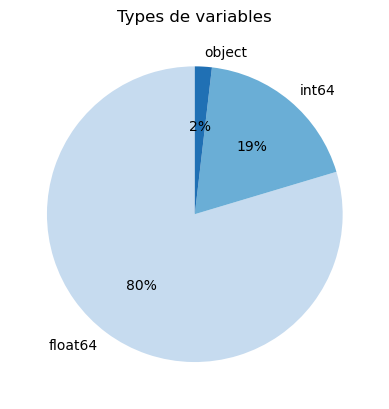

In [10]:
#Type de données
info_model_Emi_BEB_2016 = compl_info(model_Emi_BEB_2016).T.sort_values("Pourcentage remplissage").reset_index()
info_model_Emi_BEB_2016 = info_model_Emi_BEB_2016.rename(columns={'index':'Variable'})

dTypes = info_model_Emi_BEB_2016['Type'].value_counts()
blues3 = sns.color_palette(palette="Blues", n_colors =3)

plt.pie(dTypes.values.tolist(), labels=['float64','int64', 'object'], colors = blues3, autopct='%.0f%%', startangle=90)
plt.title("Types de variables")
plt.show()

<a id='pre_processing'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Pre-processing** </span></span>


<a id='data_stratification'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Stratification des données </span>

In [11]:

# Creation d'une variable catégorielle fondée dans les quantiles pour faciliter l'échantillonage stratifié

model_Emi_BEB_2016['TotalGHGEmissions_cat'] = pd.cut(model_Emi_BEB_2016['TotalGHGEmissions'],
                                                            bins=[model_Emi_BEB_2016['TotalGHGEmissions'].min(), np.quantile(model_Emi_BEB_2016['TotalGHGEmissions'], 0.25),
                                                                  np.quantile(model_Emi_BEB_2016['TotalGHGEmissions'], 0.5),
                                                                  np.quantile(model_Emi_BEB_2016['TotalGHGEmissions'], 0.75), np.inf],
                                                            labels=['0-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-inf'], include_lowest=True)


<a id=' trainSet_testSet'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Découpage données entrainement et test </span>

In [12]:

# Choix de la valeur de base pour le générateur aléatoire
randomN = 84

# Découpage des données train/test avec stratification
split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=randomN)

for train_index, test_index in split.split(model_Emi_BEB_2016, model_Emi_BEB_2016['TotalGHGEmissions_cat']):
    strat_train_set = model_Emi_BEB_2016.loc[train_index]
    strat_test_set = model_Emi_BEB_2016.loc[test_index]


<a id=' MatriceX_vecteury'></a>

---

## <span style='background:#2a679a'><span style='color:white'>  Matrice X et vecteur y </span>

**Matrice X**

In [13]:

# Matrice X
X_train = strat_train_set.drop(columns=['TotalGHGEmissions', 'TotalGHGEmissions_cat'], axis=1)
print("X_train " +str(X_train.shape))

X_test = strat_test_set.drop(columns=['TotalGHGEmissions', 'TotalGHGEmissions_cat'], axis=1)
print("X_test " +str(X_test.shape) +"\n")


X_train (1257, 53)
X_test (315, 53)



**Vecteur y**

In [14]:

# Variable cible, emissions = 'TotalGHGEmissions' 
y_train = strat_train_set['TotalGHGEmissions'].copy()
print("y_train " +str(y_train.shape))

y_test = strat_test_set['TotalGHGEmissions'].copy()
print("y_test " +str(y_test.shape) +"\n")


y_train (1257,)
y_test (315,)



<a id='scaling_variables_categorielles'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Encodage des variables catégorielles </span>

In [15]:

# Variables qualitatives
vari_quali = ['Neighborhood']

# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données 
X_train[vari_quali] = target_encoder.fit_transform(X_train[vari_quali], y_train)
X_test[vari_quali] = target_encoder.transform(X_test[vari_quali])


<a id='feature_scaling'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Feature scaling </span>

**MinMaxScaler**

In [16]:

vari_quanti = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_train_MM = X_train.copy()
X_test_MM = X_test.copy()

#MinMaxScaler
scaler_MinMax = MinMaxScaler(feature_range=(0, 1)) 

# Scaling
X_train_MM[vari_quanti] = scaler_MinMax.fit_transform(X_train_MM[vari_quanti])
X_test_MM[vari_quanti] = scaler_MinMax.transform(X_test_MM[vari_quanti])


**RobustScaler**

In [17]:

#RobustScaler, moins impacté par les outliers (n'asume pas normalité)
scaler_RobS = RobustScaler()

X_train_RS = X_train.copy()
X_test_RS = X_test.copy()

# Scaling
X_train_RS[vari_quanti] = scaler_RobS.fit_transform(X_train_RS[vari_quanti])
X_test_RS[vari_quanti] = scaler_RobS.transform(X_test_RS[vari_quanti])


**StandardScaler**

In [18]:

#RobustScaler, moins impacté par les outliers (n'asume pas normalité)
scaler_stdS = StandardScaler()

X_train_stdS = X_train.copy()
X_test_stdS = X_test.copy()

# Scaling
X_train_stdS[vari_quanti] = scaler_stdS.fit_transform(X_train_stdS[vari_quanti])
X_test_stdS[vari_quanti] = scaler_stdS.transform(X_test_stdS[vari_quanti])


<a id='Test_algo_ML'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Test de differents algorithmes de Machine Learning** </span></span>


<a id='baseline'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Baseline : Approches de régression naïves </span>

Nous utiliserons une approche de régression naïve pour établir une base de référence (Baseline) à laquelle nous pourrons comparer les résultats des différents modèles à tester.

In [19]:

# Selection de la meilleure strategie pour la baseline

dummy_param_grid = [{'strategy': ['mean', 'median']}]
dummy_regr = DummyRegressor()

dummy_test = model_selection.GridSearchCV(dummy_regr,dummy_param_grid,cv=5, scoring='r2')
dummy_test.fit(X_train_RS, y_train)


GridSearchCV(cv=5, estimator=DummyRegressor(),
             param_grid=[{'strategy': ['mean', 'median']}], scoring='r2')

In [20]:

# Selection de la meilleure strategie pour la baseline
print (dummy_test.best_params_)


{'strategy': 'mean'}


In [21]:

# Création d'un dataframe pour enregistrer les résultats de la baseline
df_resultats_dummy = pd.DataFrame(dtype='object')


In [22]:

# MinMax
# DummyRegressor mean 
# -----------------------------------------------------------------------
dummy_mean = DummyRegressor(strategy='mean')
df_resultats_dummy, y_pred = process_regression(dummy_mean, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_dummy,'DummyRegressorMean', 'MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [23]:

# RobustScaler
# DummyRegressor mean 
# -----------------------------------------------------------------------
df_resultats_dummy, y_pred = process_regression(dummy_mean, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_dummy,'DummyRegressorMean', 'RobustScaler','1er entraînement',
                                                 False, False, False, False)


In [24]:

#Standard Scaler
# DummyRegressor mean 
# -----------------------------------------------------------------------
df_resultats_dummy, y_pred = process_regression(dummy_mean, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_dummy,'DummyRegressorMean', 'StandardScaler','1er entraînement',
                                                 True, False, False, False)


In [25]:

# Sélection du meilleur résultat comme baseline
df_baseline = df_resultats_dummy.loc[df_resultats_dummy['Scaler']=='RobustScaler']


<a id='Model_linear'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Modèles lineaires </span>

In [26]:

# Création d'un dataframe pour enregistrer les résultats de l'entraînement des modèles
df_resultats_algo = pd.DataFrame(dtype='object')


<a id='reg_lineaire_nonRegul'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire no régularisée**</span></span>

 **Estimation des valeurs des variables cible grâce à une combinaison linéaire des variables utilisées pour représenter lesdites données**

In [27]:

# Linear regression
# -----------------
model_LR = LinearRegression()


In [28]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [29]:

#Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

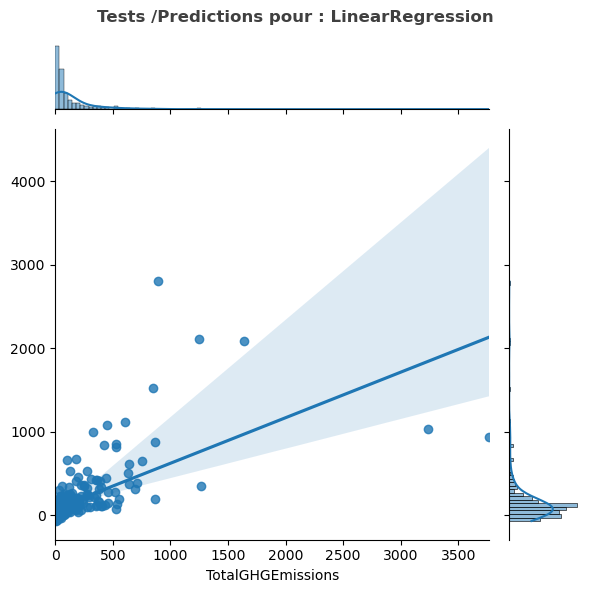

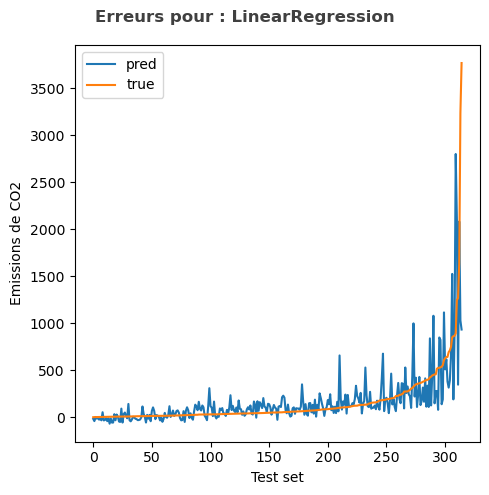

In [30]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,
                                               'LinearRegression','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='reg_lineaire_RIDGE'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire RIDGE**</span></span>


Pour limiter le sur-apprentissage, on peut utiliser une technique, la régularisation, qui consiste à contrôler simultanément l'erreur du modèle sur le jeu d'entraînement et la complexité du modèle. 

La régression ridge permet d'éviter le surapprentissage en restraignant l'amplitude des poids.

La régularisation dridge utilise pour régulariser la régression linéaire le carré de la norme du vecteur de poids. Plus précisément, il s'agit de la norme ℓ2, ou norme euclidienne.


In [31]:

# Ridge Regression
# -----------------
model_Ridge = Ridge(random_state=randomN)


In [32]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_Ridge','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [33]:

# Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_Ridge','RobustScaler','1er entraînement',
                                                 False, False, False, False)



<Figure size 500x500 with 0 Axes>

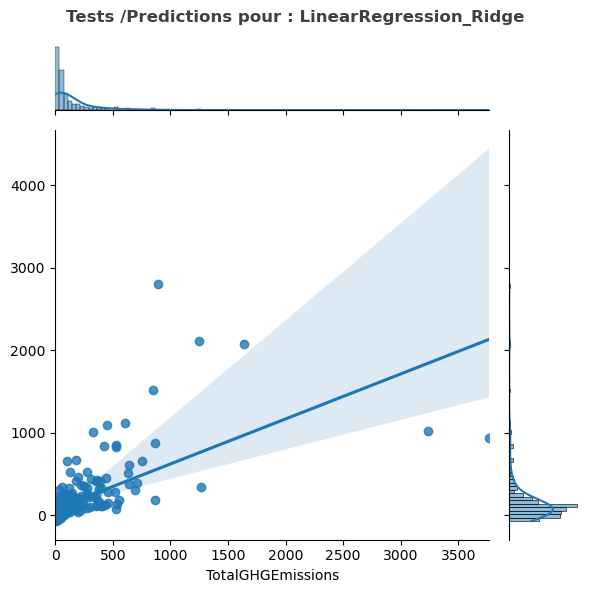

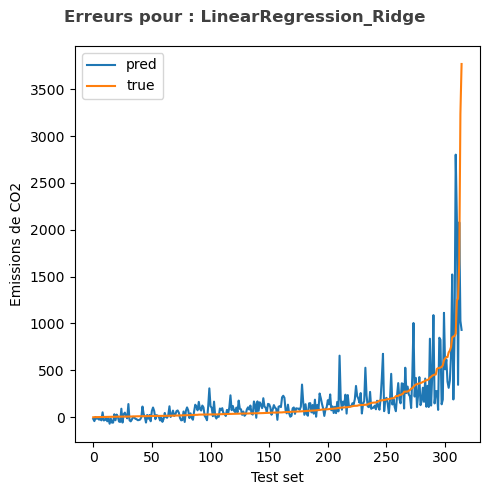

In [34]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='reg_lineaire_LASSO'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire LASSO**</span></span>


La régression linéaire LASSO (pour Least Absolute Shrinkage and Selection Operator) permets d'établir un modèle plus parcimonieux, pour ceci on utilise la norme ℓ1 du vecteur β comme régularisateur.

Il s'agit donc d'une méthode de sélection de variables et de réduction de dimension supervisée.


In [35]:

# Lasso Regression
# -----------------
model_LASSO = Lasso(random_state=randomN)


In [36]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Lasso','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [37]:

# Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Lasso','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

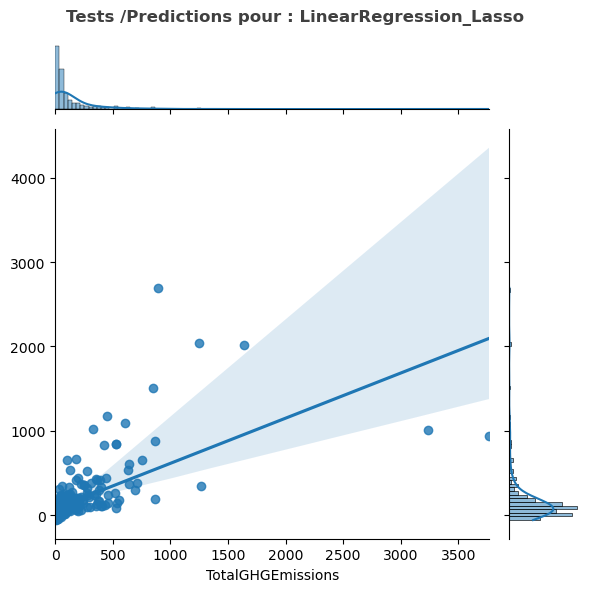

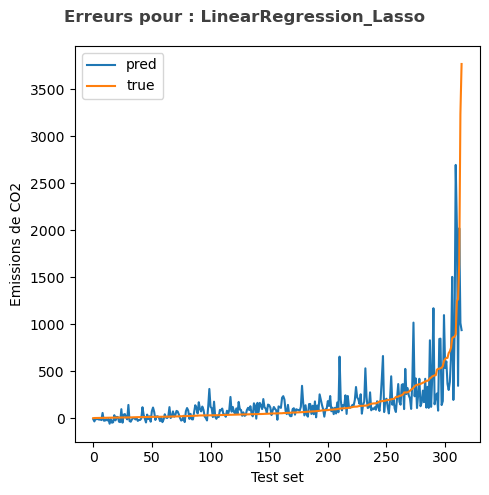

In [38]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Lasso','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='reg_lineaire_ElasticNet'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire Elastic Net**</span></span>


L'elastic net combine les normes ℓ1 et ℓ2 pour obtenir une solution moins parcimonieuse que le lasso, mais plus stable et dans laquelle toutes les variables corrélées pertinentes pour la prédiction de l'étiquette sont sélectionnées et reçoivent un poids identique.


In [39]:

# Elastic Net Regression
# ----------------------
model_ElasticNet = ElasticNet(random_state=randomN)


In [40]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_ElasticNet, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_ElasticNet','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [41]:

# Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_ElasticNet, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_ElasticNet','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

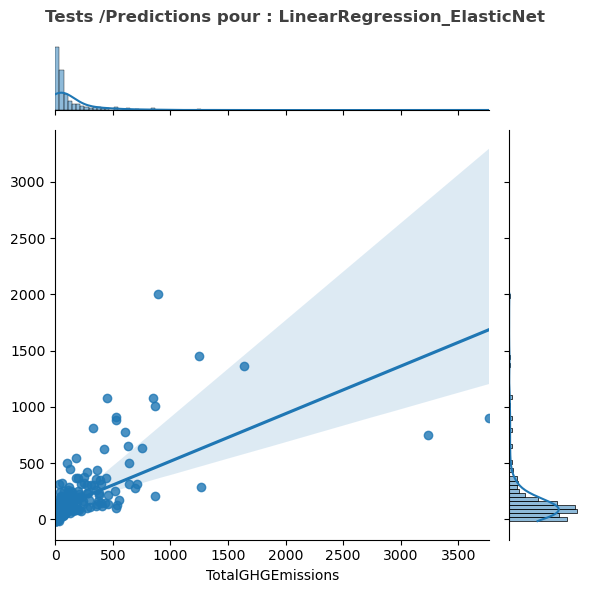

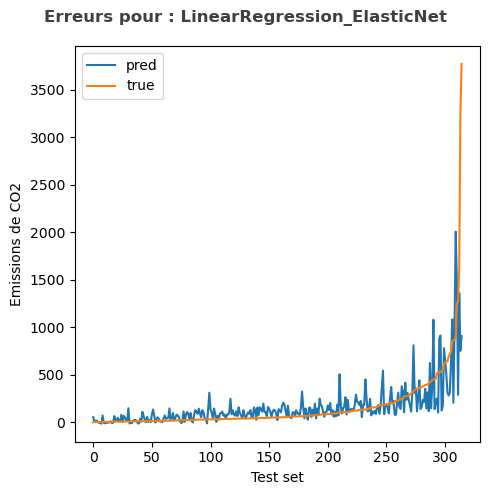

In [42]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_ElasticNet, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_ElasticNet','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='Model_NON_linear'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Modèles NON lineaires </span>

<a id='SVR'></a>

### <span style='background:#358ab7'><span style='color:white'>**SVR - Support Vector Regressor kernel non linéaire**</span></span>


Les modèles 'Support Vector Machine' (SVM) cherchent des hyperplans de marge maximale. 
Dans certains cas il n'éxiste pas de séparateur linéaire. Afin de remédier à ce problème, on utlise l'astuce du noyau (en anglais kernel trick). C'est à dire on reconsidère le problème dans un espace de dimension supérieure, éventuellement de dimension infinie. Dans ce nouvel espace, il est alors probable qu'il existe une séparation linéaire.

Les modèles SVR ce sont des càs particuliers de SVM à noyau pour la régression.


In [43]:

# Régression SVR
# ---------------
model_svr = SVR(kernel='rbf')


In [44]:

# MinMax Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_svr, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'SVR','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [45]:

# Robust Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_svr, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'SVR','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

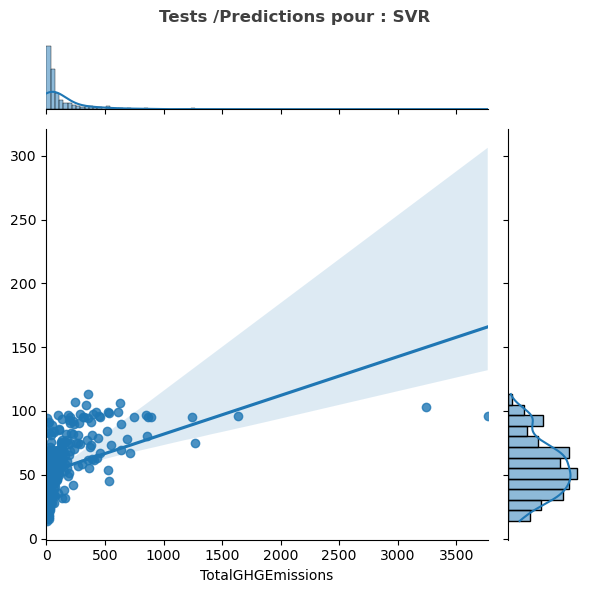

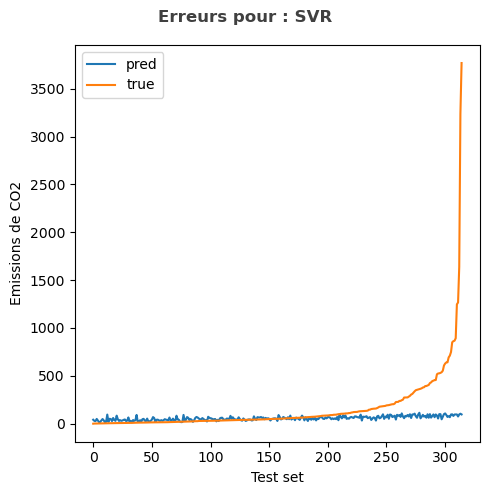

In [46]:

# Standard Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_svr, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'SVR','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='KNR'></a>

### <span style='background:#358ab7'><span style='color:white'>**K-Neighbors Regressor**</span></span>


Régression basée sur les k plus proches voisins.

La y_pred est prédite par interpolation locale des y_train associées aux plus proches voisins dans X_train.


In [47]:

# Régression KNR
# ---------------
model_KNR = KNeighborsRegressor()


In [48]:

# MinMax Scaler
df_resultats_algo, y_pred = process_regression(model_KNR, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'K_NeighborsRegression','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7f797000d0>
Traceback (most recent call last):
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

In [49]:

# Robust Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_KNR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'K_NeighborsRegression','RobustScaler','1er entraînement',
                                                 False, False, False, False)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7f796af670>
Traceback (most recent call last):
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7f796afb80>
Traceback (most recent call last):
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

<Figure size 500x500 with 0 Axes>

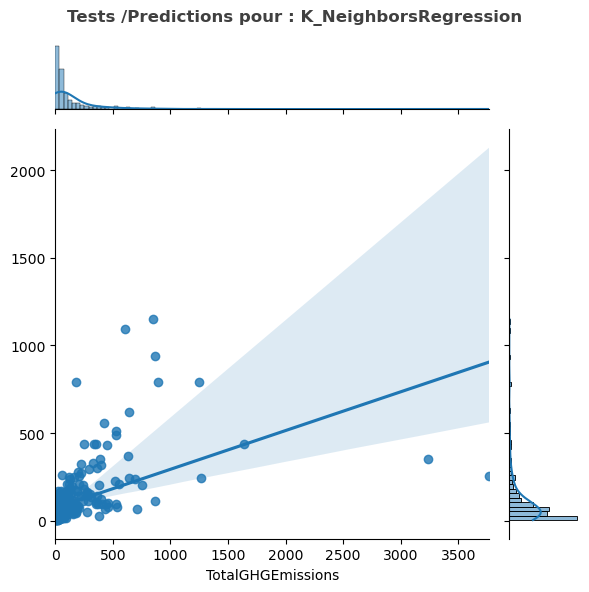

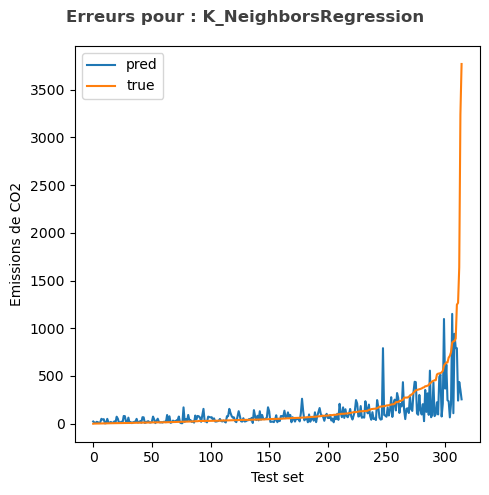

In [50]:

# Standard Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_KNR, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'K_NeighborsRegression','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='random_Forest'></a>

### <span style='background:#358ab7'><span style='color:white'>**Random Forest Regressor**</span></span>


Méthode de bagging où les arbres profonds (low bias, high variance), ajustés sur des échantillons bootstrap de données et des sous-ensembles aléatoires de features, sont combinés (moyenne des prédictions pour tous les arbres pour la régression) pour produire une sortie avec une variance plus faible.


In [51]:

# Régression Random Forest
# ------------------------
model_RF = RandomForestRegressor(random_state=randomN)


In [52]:

# MinMax Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Random_Forest','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [53]:

# Robust Scaler
# -------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Random_Forest','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

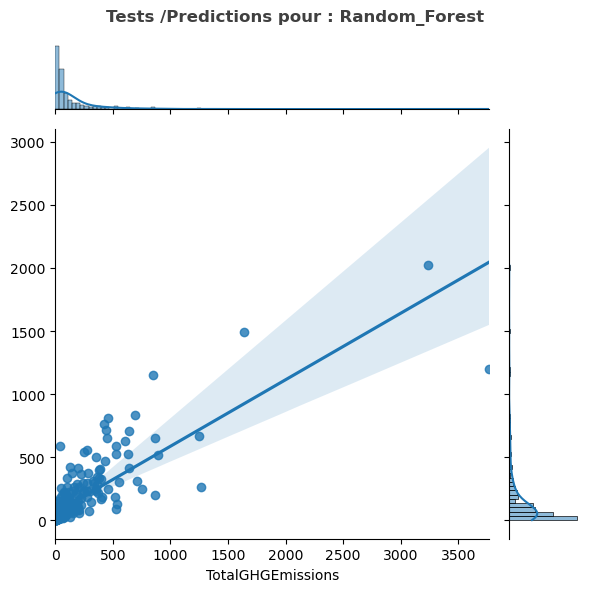

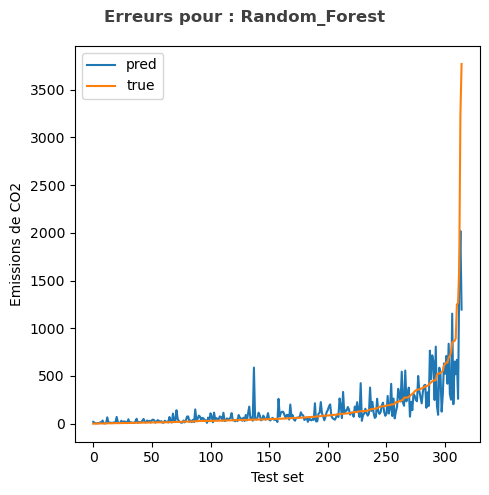

In [54]:

# Standard Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Random_Forest','StandardScaler','1er entraînement',
                                                 True, True, True, False)


**Visualisation de l'arbre de décision de Random Forest**

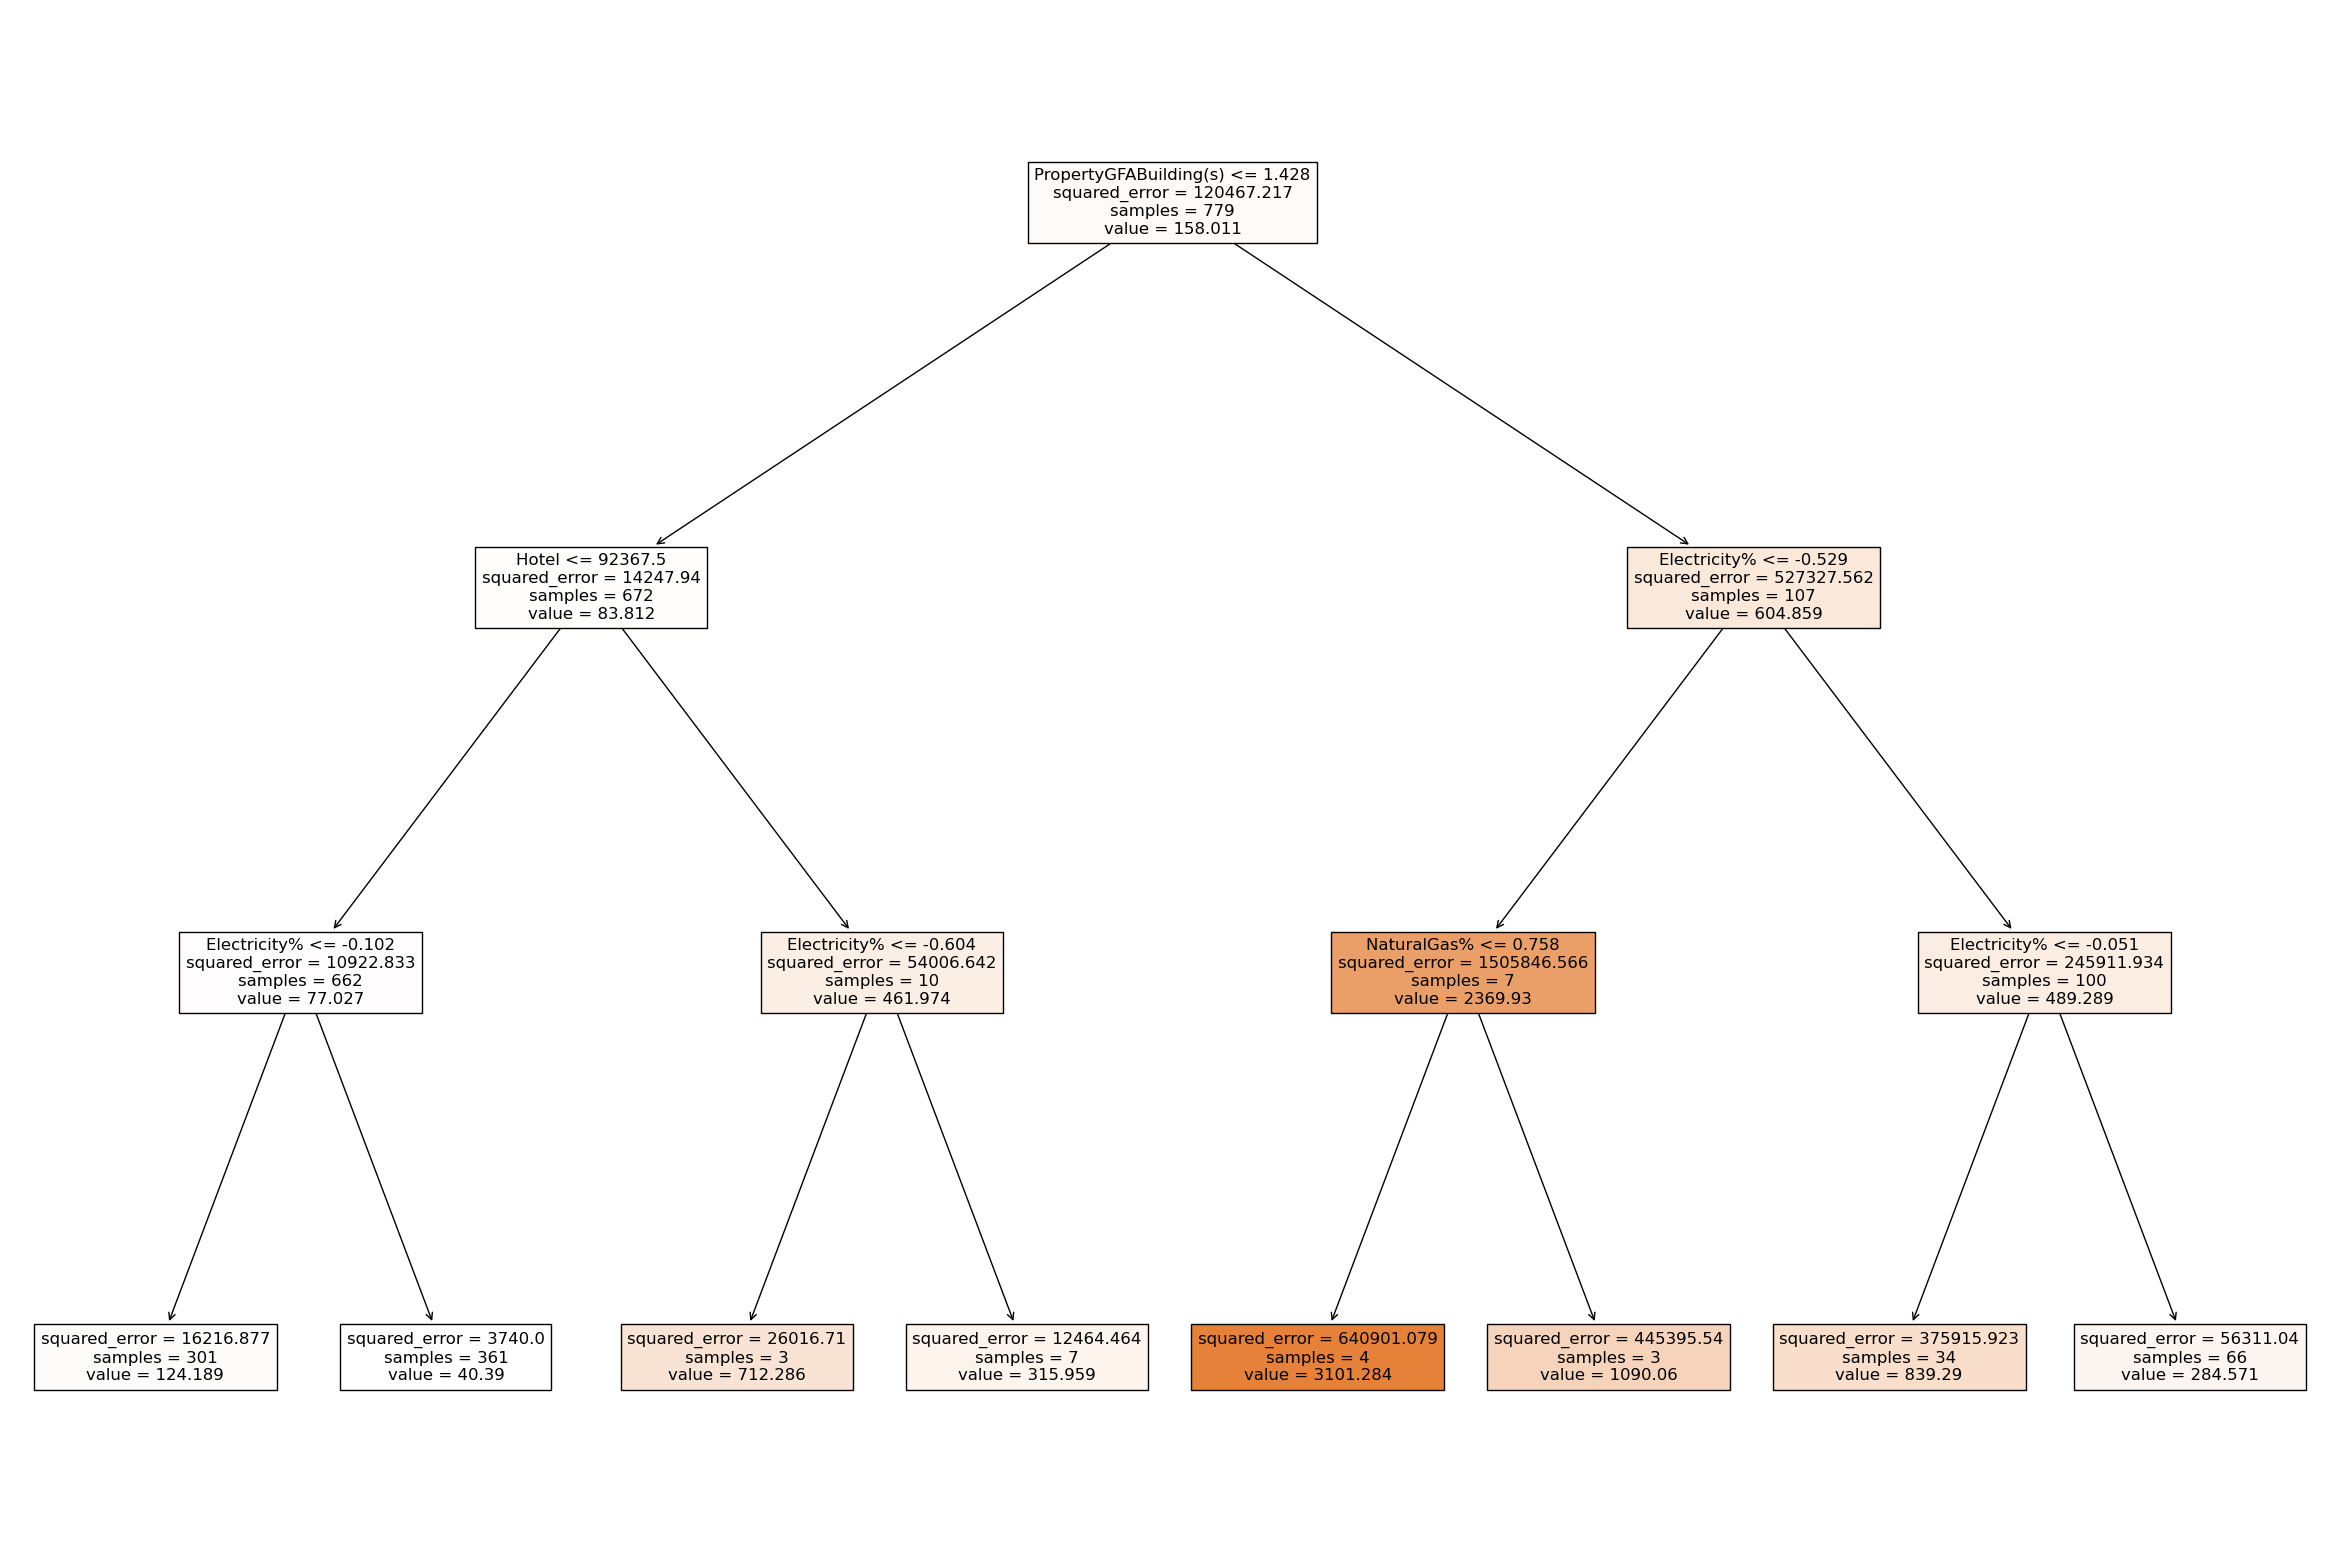

In [55]:
RF_visu = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=randomN)

# Entraînement du modèle
RF_visu.fit(X_train_RS, y_train)

# Prédictions avec le test set
y_pred = RF_visu.predict(X_test_RS)

# Visualisation avec tree de sklearn
plt.figure(figsize=(30, 20))
vis = tree.plot_tree(RF_visu.estimators_[0], feature_names=X_train_RS.columns, filled=True)
plt.show()


<a id='adaBoost'></a>

### <span style='background:#358ab7'><span style='color:white'>**Ada Boost Regressor**</span></span>

In [56]:

# Régression  LightGBM
# ---------------------
model_adaBoost = AdaBoostRegressor(random_state=randomN)


In [57]:

# MinMax Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_adaBoost, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Ada_Boost','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [58]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_adaBoost, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Ada_Boost','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

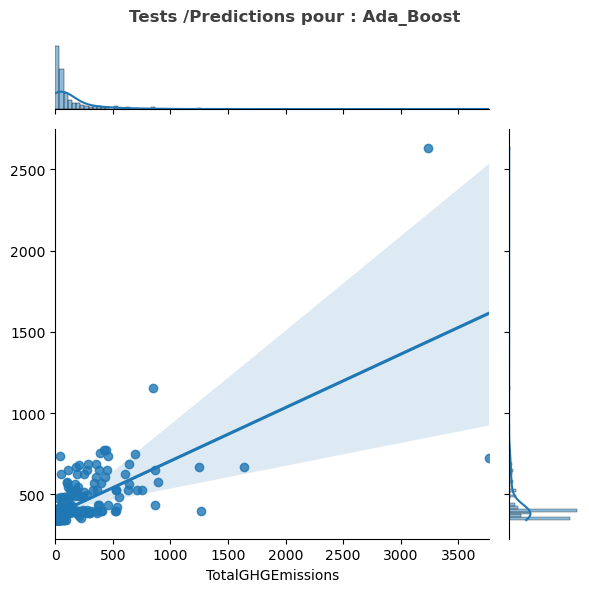

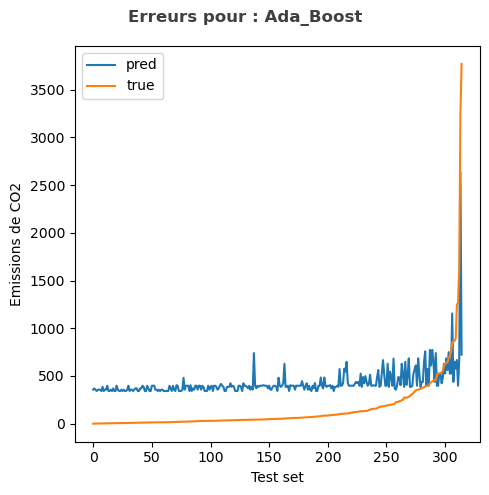

In [59]:

# Standard Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_adaBoost, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Ada_Boost','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='LightGBM'></a>

### <span style='background:#358ab7'><span style='color:white'>**Light Gradient Boosting Machine**</span></span>

In [60]:

# Régression  LightGBM
# ---------------------
model_lgbm = LGBMRegressor(random_state=randomN)


In [61]:

# MinMax Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Light_GBM','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [62]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Light_GBM','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

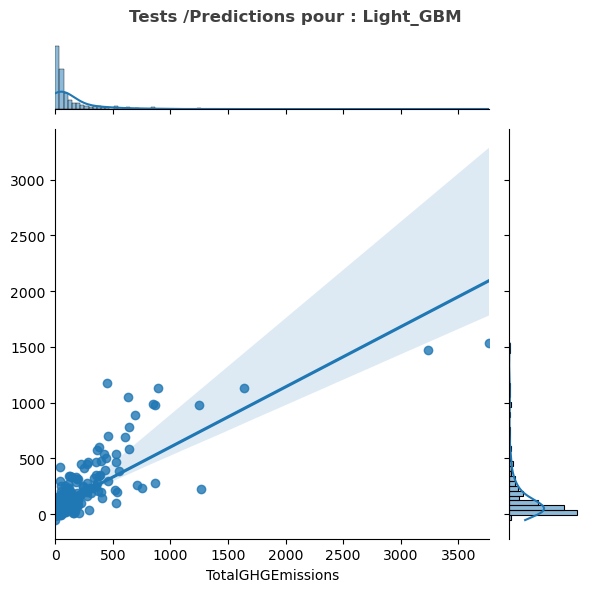

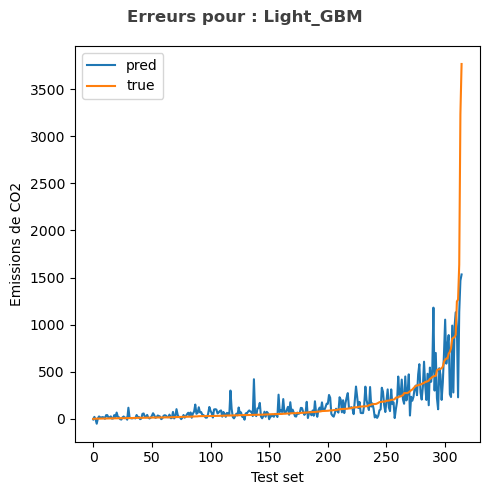

In [63]:

# Standard Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Light_GBM','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='Gradient_Boosting'></a>

### <span style='background:#358ab7'><span style='color:white'>**Gradient Boosting Regressor**</span></span>

In [64]:

# Régression Gradient Boosting
# ----------------------------
model_GBR = GradientBoostingRegressor(random_state=randomN, verbose=False)


In [65]:

# MinMax Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Gradient_Boosting','MinMaxScaler','1er entraînement',
                                                 False, False, False, False)


In [66]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Gradient_Boosting','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<Figure size 500x500 with 0 Axes>

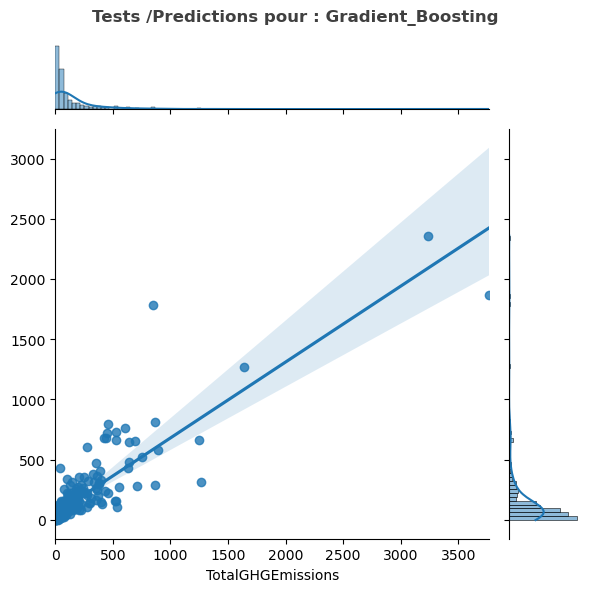

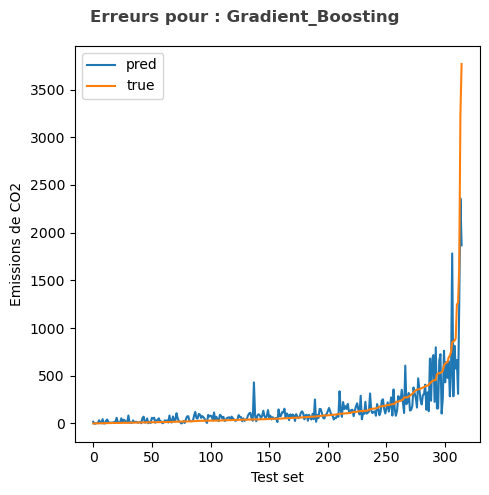

In [67]:

# Standard Scaler
# ----------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Gradient_Boosting','StandardScaler','1er entraînement',
                                                 True, True, True, False)


<a id='bilan_algorithmes'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Bilan des algorithmes testés </span>

**Tableau de résultats des scores par modèle**

In [68]:

bilan_algo = df_resultats_algo.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_algo.style.hide(axis="index")


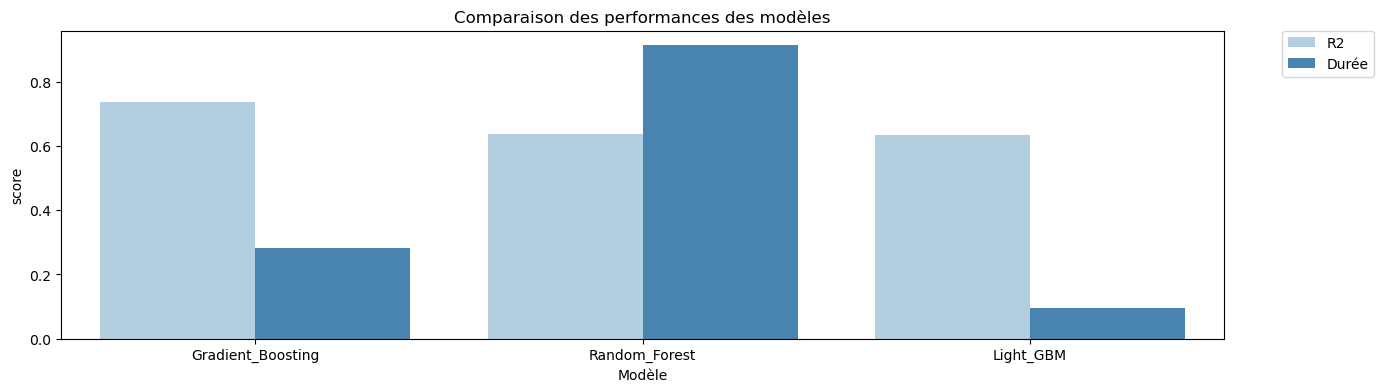

In [69]:

# Comparaison des 3 algorithmes les plus performants
df_compar = bilan_algo.loc[((bilan_algo["Modèle"] == 'Gradient_Boosting') &(bilan_algo["Scaler"] == 'RobustScaler')) | 
                           ((bilan_algo["Modèle"] == 'Random_Forest') &(bilan_algo["Scaler"] == 'StandardScaler'))  |
                           ((bilan_algo["Modèle"] == 'Light_GBM') &(bilan_algo["Scaler"] == 'RobustScaler')) ]


comparaison_score_melt1 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(15,4))
sns.barplot(x=comparaison_score_melt1['Modèle'],
            y=comparaison_score_melt1['score'], hue=comparaison_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


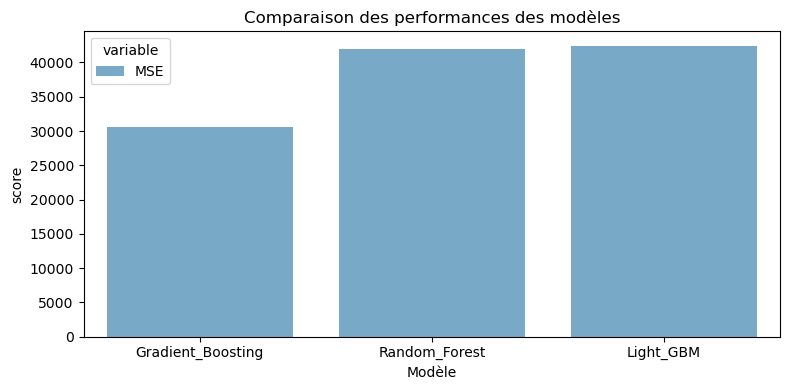

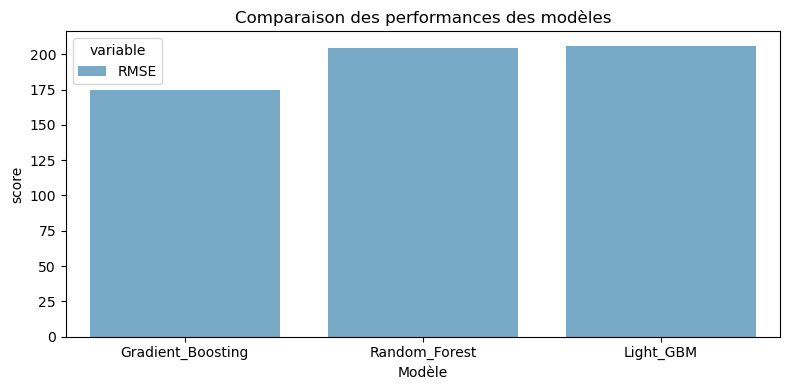

In [70]:

# Comparaison des 4 algorithmes les plus performants

comparaison_score_melt2 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_score_melt3 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(8,4))
sns.barplot(x=comparaison_score_melt2['Modèle'],
            y=comparaison_score_melt2['score'], hue=comparaison_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=comparaison_score_melt3['Modèle'],
            y=comparaison_score_melt3['score'], hue=comparaison_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()


<a id='opti_algo'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Optimisation algorithmes** </span></span>


In [71]:
# Création d'un dataframe pour enregistrer les résultats 
df_resultats_opti = pd.DataFrame(dtype='object')

<a id='id_hyperparamètres'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Idéntification hyperparamètres </span>

In [72]:

# Création d'un dataframe pour enregistrer les résultats de l'optimissation des algorithmes 
df_resultats_opti = pd.DataFrame(dtype='object')


<a id='Gradient_Boosting_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Gradient Boosting Regressor**</span></span>

In [73]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'Gradient_Boosting']


Modèle          Scaler    Durée       R2   MAE      MSE   RMSE  \
0  Gradient_Boosting    MinMaxScaler  0.29028  0.73611  73.0  30562.0  174.8   
0  Gradient_Boosting    RobustScaler  0.28077  0.73611  73.0  30562.0  174.8   
0  Gradient_Boosting  StandardScaler  0.28187  0.73611  73.0  30562.6  174.8   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.962405    0.636144   4072.454192  42281.695401  
0     0.962405    0.635060   4072.454192  42618.784833  
0     0.962405    0.636144   4072.454192  42281.695401


Les résultats de l'algorithme 'Gradient Boost Regressor' ne varient pas beaucoup en fonction de la mèthode de mise à l'échelle des données.
On decide d'optimiser les paramètres avec la mise à l'échelle avec 'RobustScaler'


In [74]:

df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 72.91
 R2: 0.7361 


In [75]:

# Paramètres de base d'un algorithme "Gradient Boosting Regressor"
print("Les paramètres par défaut pour l'algorithme 'Gradient Boosting Regressor':")
pprint(model_GBR.get_params())


Les paramètres par défaut pour l'algorithme 'Gradient Boosting Regressor':
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 84,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [76]:

# Séléction des valeurs des hyperparamètres à tester
GBR_params = {'n_estimators' : [50, 100, 150],
              'learning_rate' : [0.05,0.1, 0.2],
              'max_depth' : [3, 7, None],
              'min_samples_split' : [2, 4]}


In [77]:

#Cross validation des combinaisons des valeurs des differents paramètres

GBR_grid = model_selection.GridSearchCV(model_GBR, GBR_params,
                                        cv =stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

GBR_grid.fit(X_train_RS, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(error_score='raise',
             estimator=GradientBoostingRegressor(random_state=84,
                                                 verbose=False),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 7, None], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

In [78]:

#
best_GBR_params = GBR_grid.best_params_
best_GBR_params


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 4,
 'n_estimators': 150}

In [79]:

# Création d'un dataframe pour enregistrer les résultats 
GBR_params_results = pd.DataFrame(dtype='object')

resultize(GBR_grid,GBR_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
23       0.332428      0.000783         0.001672        0.000006   
22       0.223170      0.001516         0.001581        0.000023   

   param_learning_rate param_max_depth param_n_estimators  \
23                 0.1               3                150   
22                 0.1               3                100   

                                               params  mean_test_score  \
23  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...         0.655623   
22  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...         0.652306   

    std_test_score  rank_test_score  mean_train_score  std_train_score  
23        0.129169                1          0.971664         0.004923  
22        0.128520                2          0.961131         0.007680

In [80]:

model_GBR_opti = GradientBoostingRegressor(**best_GBR_params, random_state=randomN, verbose=False)

df_resultats_opti, y_pred = process_regression(model_GBR_opti, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_opti,'Gradient_Boosting_opti', 'RobustScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 71.83
 R2: 0.7437 


In [81]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Gradient_Boosting') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Gradient_Boosting_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Gradient_Boosting') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Gradient_Boosting_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 1.03%. 
Amélioration de la durée : 49.32%. 


<a id='RF_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Random Forest Regressor**</span></span>

In [82]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'Random_Forest']


Modèle          Scaler    Durée       R2   MAE      MSE   RMSE  \
0  Random_Forest    MinMaxScaler  0.92093  0.63824  76.0  41896.9  204.7   
0  Random_Forest    RobustScaler  0.90363  0.63815  76.0  41907.7  204.7   
0  Random_Forest  StandardScaler  0.91341  0.63825  76.0  41896.5  204.7   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.945534    0.645188   6247.911589  42007.438708  
0     0.945448    0.643748   6258.655138  42399.787984  
0     0.945445    0.645407   6258.391369  41994.593460


Les résultats de l'algorithme 'Random Forest Regressor' ne varient pas beaucoup en fonction de la mèthode de mise à l'échelle des données.
On decide d'optimiser les paramètres avec la mise à l'échelle avec 'Standard Scaler'


In [83]:

df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 75.55
 R2: 0.6382 


In [84]:

# Paramètres de base d'un algorithme "Random Forest Regressor"
print("Les paramètres pour l'algorithme 'Random Forest Regressor':")
pprint(model_RF.get_params())


Les paramètres pour l'algorithme 'Random Forest Regressor':
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 84,
 'verbose': 0,
 'warm_start': False}


In [85]:

# Séléction des valeurs des hyperparamètres à tester
RF_params = {'n_estimators' : [50, 100, 150],
             'max_depth': [None, 5,10],
             'min_samples_split': [2,3,5,8,15]             
             }


In [86]:

#Cross validation des combinaisons des valeurs des differents paramètres

RF_grid = model_selection.GridSearchCV(model_RF, RF_params,
                                        cv =stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

RF_grid.fit(X_train_stdS, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(error_score='raise',
             estimator=RandomForestRegressor(random_state=84),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 5, 8, 15],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

In [87]:

#
best_RF_params = RF_grid.best_params_
best_RF_params


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [88]:

# Création d'un dataframe pour enregistrer les résultats 
RF_params_results = pd.DataFrame(dtype='object')

resultize(RF_grid,RF_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.357504      0.009886         0.005699        0.000113   
1       0.705189      0.019634         0.009879        0.000257   

  param_max_depth param_n_estimators  \
0            None                 50   
1            None                100   

                                              params  mean_test_score  \
0  {'max_depth': None, 'min_samples_split': 2, 'n...         0.650196   
1  {'max_depth': None, 'min_samples_split': 2, 'n...         0.645407   

   std_test_score  rank_test_score  mean_train_score  std_train_score  
0        0.063377                1          0.944807         0.006327  
1        0.060808                2          0.945445         0.005551

In [89]:

model_RF_opti = GradientBoostingRegressor(**best_RF_params, random_state=randomN, verbose=False)

df_resultats_opti, y_pred = process_regression(model_RF_opti, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_opti,'Random_Forest_opti', 'StandardScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 93.41
 R2: 0.4038 


In [90]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Random_Forest') & (df_resultats_algo['Scaler'] =='StandardScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Random_Forest_opti') & (df_resultats_opti['Scaler'] =='StandardScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Random_Forest') & (df_resultats_algo['Scaler'] =='StandardScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Random_Forest_opti') & (df_resultats_opti['Scaler'] =='StandardScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : -36.73%. 
Amélioration de la durée : -14.38%. 


<a id='LightGBM_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Light Gradient Boosting Machine**</span></span>


In [91]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'Light_GBM']


Modèle          Scaler    Durée       R2   MAE      MSE   RMSE  \
0  Light_GBM    MinMaxScaler  0.13354  0.63201  82.0  42619.2  206.4   
0  Light_GBM    RobustScaler  0.09536  0.63369  83.0  42423.9  206.0   
0  Light_GBM  StandardScaler  0.14262  0.63300  81.0  42504.1  206.2   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.886449    0.526674  12888.675768  53897.900928  
0     0.889121    0.523109  12535.579713  54362.259606  
0     0.890669    0.520036  12356.337401  54505.995180


Les meilleurs résultats de l'algorithme de régression 'Light Gradient Boost' sont atteints après la mise à l'échelle avec **Robust Scaler**.


In [92]:

df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 82.91
 R2: 0.6337 


In [93]:

# Paramètres de base d'un algorithme "Light Gradient Boosting Machine"
print("Les paramètres pour l'algorithme 'Light Gradient Boosting Machine':")
pprint(model_lgbm.get_params())


Les paramètres pour l'algorithme 'Light Gradient Boosting Machine':
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 84,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [94]:

# Séléction des valeurs des hyperparamètres à tester
lgbm_params = {'n_estimators' : [50, 100, 150],
               'boosting_type': ['gbdt','dart'],
               'colsample_bytree': [0.75,1.0],
               'learning_rate' : [0.05,0.1, 0.2],
               'max_depth' : [-1, 3, 7],
               'num_leaves': [15,31,50]
               }


In [95]:

#Cross validation des combinaisons des valeurs des differents paramètres

lgbm_grid = model_selection.GridSearchCV(model_lgbm, lgbm_params,
                                        cv =stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

lgbm_grid.fit(X_train_RS, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(error_score='raise', estimator=LGBMRegressor(random_state=84),
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.75, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [-1, 3, 7],
                         'n_estimators': [50, 100, 150],
                         'num_leaves': [15, 31, 50]},
             return_train_score=True, verbose=1)

In [96]:

#
best_lgbm_params = lgbm_grid.best_params_
best_lgbm_params


{'boosting_type': 'dart',
 'colsample_bytree': 0.75,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 100,
 'num_leaves': 31}

In [97]:
# Création d'un dataframe pour enregistrer les résultats 
lgbm_params_results = pd.DataFrame(dtype='object')

In [98]:
resultize(lgbm_grid,lgbm_params_results).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
238       0.065096      0.005178         0.001309        0.000038   
215       0.117645      0.006086         0.001497        0.000034   
214       0.115471      0.007032         0.001473        0.000082   
239       0.065418      0.002982         0.001329        0.000032   
237       0.058606      0.001381         0.001309        0.000041   

    param_boosting_type param_colsample_bytree param_learning_rate  \
238                dart                   0.75                 0.2   
215                dart                   0.75                 0.1   
214                dart                   0.75                 0.1   
239                dart                   0.75                 0.2   
237                dart                   0.75                 0.2   

    param_max_depth param_n_estimators param_num_leaves  \
238               7                100               31   
215               7                150               50   
214               7                150               31   
239               7                100               50   
237               7                100               15   

                                                params  mean_test_score  \
238  {'boosting_type': 'dart', 'colsample_bytree': ...         0.567783   
215  {'boosting_type': 'dart', 'colsample_bytree': ...         0.565871   
214  {'boosting_type': 'dart', 'colsample_bytree': ...         0.565728   
239  {'boosting_type': 'dart', 'colsample_bytree': ...         0.565499   
237  {'boosting_type': 'dart', 'colsample_bytree': ...         0.564958   

     std_test_score  rank_test_score  mean_train_score  std_train_score  
238        0.043007                1          0.813611         0.018424  
215        0.041206                2          0.768333         0.027686  
214        0.041450                3          0.769267         0.028492  
239        0.047043                4          0.813310         0.018301  
237        0.044942                5          0.810820         0.018238

In [99]:

model_lgbm_opti = LGBMRegressor(**best_lgbm_params, random_state=randomN)

df_resultats_opti, y_pred = process_regression(model_lgbm_opti, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_opti,'Light_GBM_opti', 'RobustScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 77.98
 R2: 0.6025 


In [100]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Light_GBM') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Light_GBM_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Light_GBM') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Light_GBM_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : -4.92%. 
Amélioration de la durée : 108.44%. 


<a id='selec_algo_co2'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Sélection du meilleur algorithme pour la estimation desEmissions de CO2</span>
    

**Tableau de résultats des scores par modèle**

In [101]:

bilan_opti_algo = df_resultats_opti.append(df_baseline, ignore_index=True)

bilan_opti_algo = bilan_opti_algo.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_opti_algo.style.hide(axis="index")

bilan_opti_algo



Modèle          Scaler    Durée       R2    MAE       MSE  \
0  Gradient_Boosting_opti    RobustScaler  0.41924  0.74366   72.0   29688.2   
2          Light_GBM_opti    RobustScaler  0.19877  0.60250   78.0   46036.3   
1      Random_Forest_opti  StandardScaler  0.78210  0.40383   93.0   69045.4   
3      DummyRegressorMean    RobustScaler  0.00054 -0.00010  163.0  115827.3   

    RMSE  CV Train R2  CV Test R2   CV Train MSE    CV Test MSE  
0  172.3     0.971664    0.655623    3080.893229   40109.566249  
2  214.6     0.813611    0.567783   21158.069720   51859.098480  
1  262.8     0.999973    0.266634       3.000026   69654.361427  
3  340.3     0.000000   -0.015124  112946.826129  113712.110176

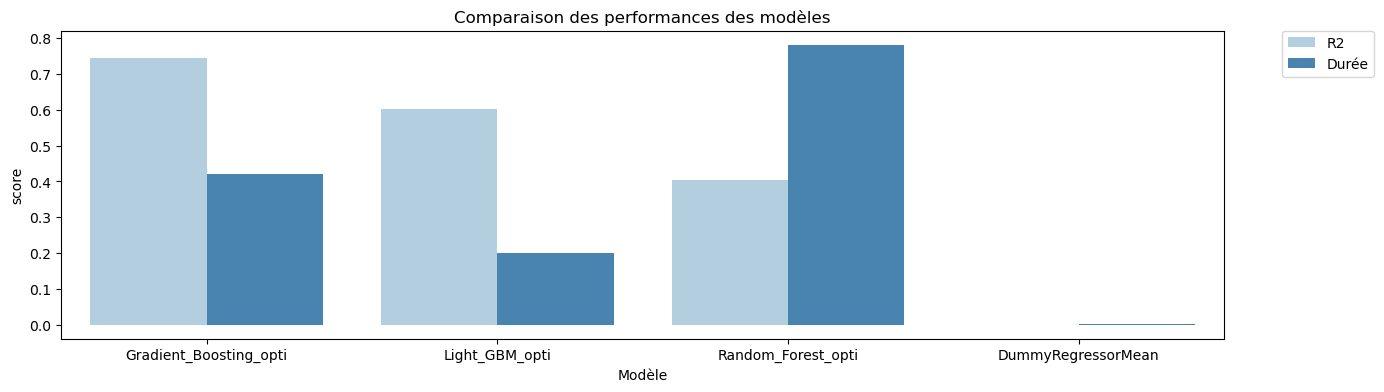

In [102]:

# Comparaison des 3 algorithmes les plus performants

comparaison_opti_score_melt1 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(15,4))
sns.barplot(x=comparaison_opti_score_melt1['Modèle'],
            y=comparaison_opti_score_melt1['score'], hue=comparaison_opti_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


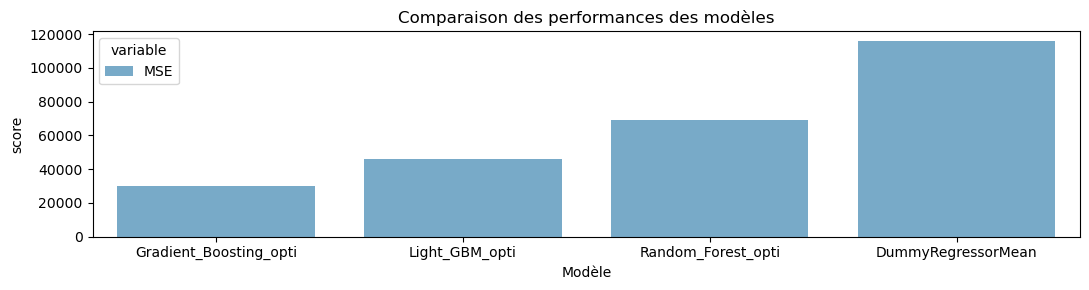

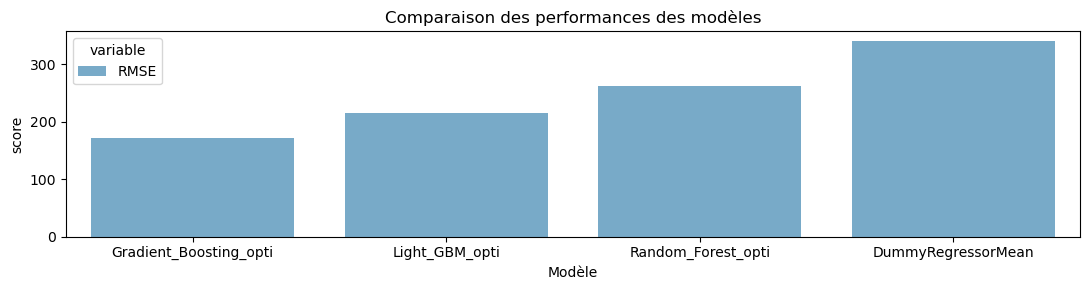

In [103]:

# Comparaison des 4 algorithmes les plus performants

comparaison_opti_score_melt2 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_opti_score_melt3 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_opti_score_melt2['Modèle'],
            y=comparaison_opti_score_melt2['score'], hue=comparaison_opti_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_opti_score_melt3['Modèle'],
            y=comparaison_opti_score_melt3['score'], hue=comparaison_opti_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()


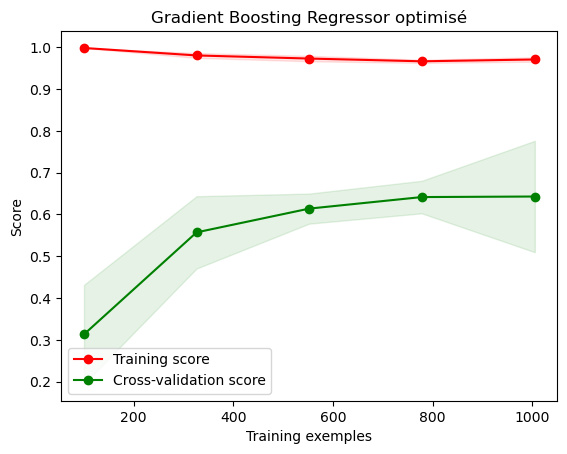

In [104]:

# Gradient Boosting Regressor
plot_learning_curve(model_GBR_opti, 'Gradient Boosting Regressor optimisé', X_train_RS, y_train, cv = stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']))




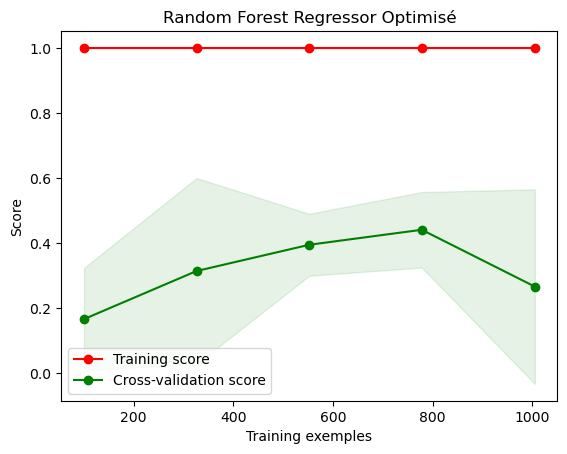

In [105]:

# Random Forest Regressor
plot_learning_curve(model_RF_opti, 'Random Forest Regressor Optimisé', X_train_RS, y_train, cv = stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']))




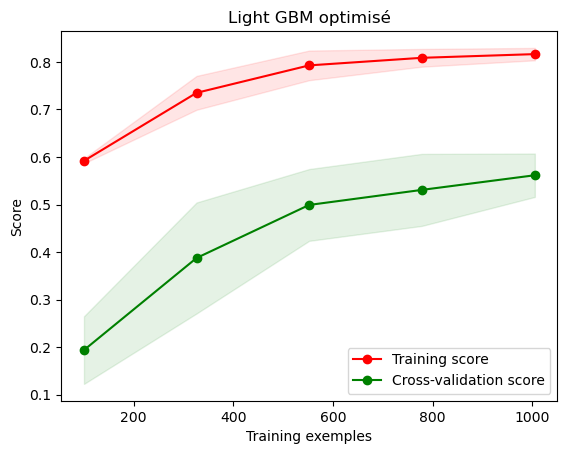

In [106]:

#  Light GBM
plot_learning_curve(model_lgbm_opti, 'Light GBM optimisé', X_train_stdS, y_train, cv = stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']))






**Bilan**

---

L'algorithme pour la prédiction des Émissions de CO2 présentant les meilleurs scores ainsi que la durée la plus courte est "Gradient Boosting Regressor"  sur le jeu de données ayant suivi une mise à l'échelle avec Robust Scaler.

---


<a id='pred_final_co2'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Prédictions émissions CO2 du modèle final** </span></span>



In [107]:

#---------------------------------------------------------------------------------------
# Chargement des jeux de données  utiles pour la comprehension des erreurs de prédiction
#---------------------------------------------------------------------------------------
source_BEB_2016 = pd.read_csv('/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_source/2016_Building_Energy_Benchmarking.csv', low_memory=False,encoding='utf-8')
index_BEB_2016 = pd.read_csv('index_BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')


In [108]:

model_GBR_opti.fit(X_train_RS, y_train)

# Predictions avec le train set
y_train_pred = model_GBR_opti.predict(X_train_RS)

# Predictions avec le test set
y_test_pred = model_GBR_opti.predict(X_test_RS)


<a id='features_importance_CO2'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables pour la estimation des emissions de CO2 </span>
    

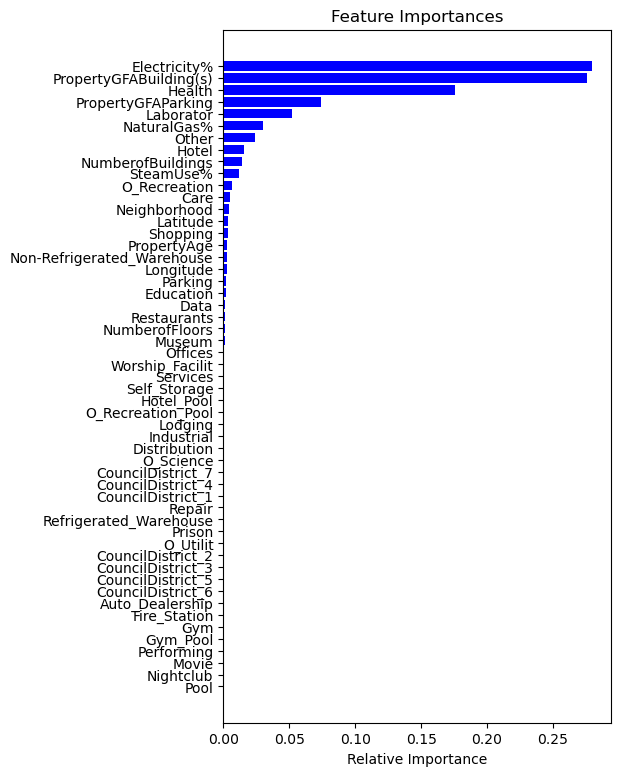

In [109]:

importances = model_GBR_opti.feature_importances_
indices = np.argsort(importances)
features = X_train_RS.columns

plt.figure(figsize=(5,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()




In [110]:

# Création du 'Explainer' en considerant la rélation entre les variables
#GBR_ridge_explainer = shap.KernelExplainer(model_GBR_opti, X_train_RS)

GBRopti_expl = shap.TreeExplainer(model_GBR_opti,X_test_RS)


In [111]:

# Préparation des paramètres pour les représentations graphiques

shap_values_exp = GBRopti_expl.shap_values(X_test_RS)
featureNames = model_Emi_BEB_2016.drop(columns=['TotalGHGEmissions','TotalGHGEmissions_cat'], axis=1).columns.tolist()
maxDisp = len(featureNames)


In [112]:

# Importance des variables global
valeurs= np.abs(shap_values_exp).mean(0)
global_feature_importance = pd.DataFrame(list(zip(X_test_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
global_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
global_feature_importance = global_feature_importance.reset_index(drop=True)


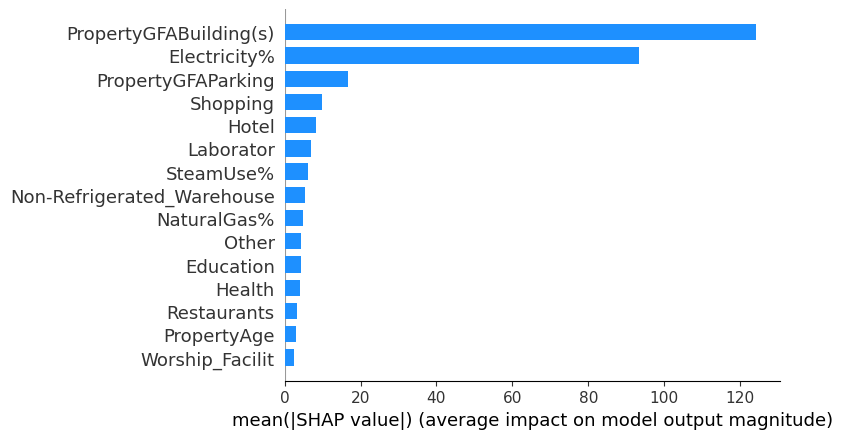

In [113]:

shap.summary_plot(shap_values_exp, max_display=15, plot_type="bar",feature_names=featureNames, color="dodgerblue", plot_size = 0.2)


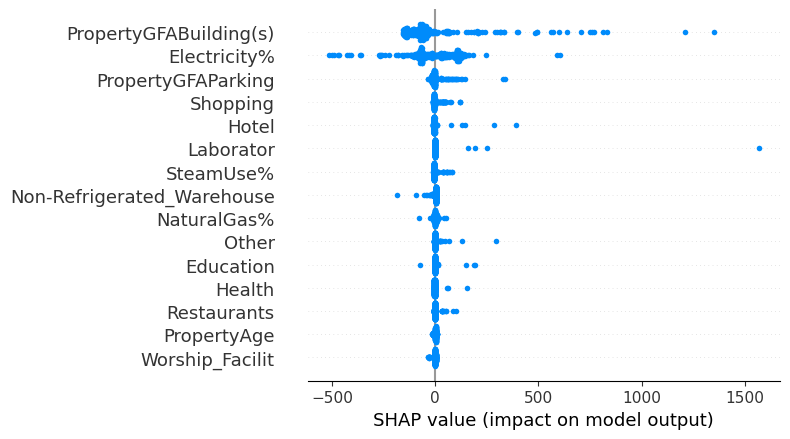

In [114]:

shap.summary_plot(shap_values_exp, max_display=15,feature_names=featureNames, plot_size = 0.2)


In [115]:

shap.plots.force(GBRopti_expl.expected_value, shap_values_exp, feature_names=featureNames, out_names="Emissions de CO2")


<a id='pred_errors_Co2'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Erreurs de prédiction </span>



<span style='color:#67d1e9'>**Erreurs sur le train set**</span>


In [116]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_train = pd.DataFrame({'y_train_pred': y_train_pred, 'y_train': y_train})
df_error_train['erreur_abs'] = abs(y_train_pred - y_train)


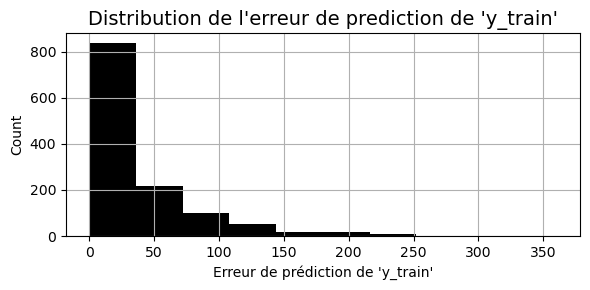

In [117]:

# Répresentation graphique de l'erreur absolut de predction du set de entraînement
df_error_train['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_train'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_train'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()



<span style='color:#67d1e9'>**Erreurs sur le test set**</span>


In [118]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_test = pd.DataFrame({'y_test_pred': y_test_pred, 'y_test': y_test})
df_error_test['erreur_abs'] = abs(y_test_pred - y_test)


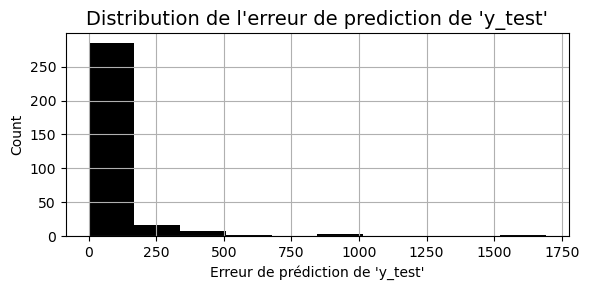

In [119]:

# Répresentation graphique de l'erreur absolut de predction du set de test
df_error_test['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_test'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_test'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()


In [120]:
df_error_test['erreur_abs'].describe()

count     315.000000
mean       71.825526
std       156.867604
min         0.041476
25%         9.806567
50%        29.150886
75%        58.515648
max      1691.929943
Name: erreur_abs, dtype: float64

<a id='min_max_error'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur maximale et minimale sur le jeu de test**</span></span>

In [121]:
# Erreur maximale
df_error_max = df_error_test[df_error_test['erreur_abs'] == df_error_test['erreur_abs'].max()]
df_error_max


y_test_pred   y_test   erreur_abs
1232  2076.730057  3768.66  1691.929943

In [122]:

# Obtention des les informations concernant la propriété associée à l'erreur
print("La propriétée avec l'erreur de prédiction maximale est : \n")

prop_max_error = index_BEB_2016.iloc[df_error_max.index.to_list(), :]
OSEBuildingID_prop_max_error = prop_max_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_max_error[0]]


La propriétée avec l'erreur de prédiction maximale est : 



OSEBuildingID  DataYear BuildingType PrimaryPropertyType  \
2325          25251      2016       Campus          University   

                 PropertyName          Address     City State  ZipCode  \
2325  5th Avenue Master Meter  3307 3rd Ave. W  Seattle    WA  98119.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
2325                    8900000555                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
2325  MAGNOLIA / QUEEN ANNE  47.65019 -122.36173       1945   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2325               14.0               2            537000                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
2325                  537000        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2325                   533826.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2325                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2325                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
2325              NaN        169.699997          181.300003   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
2325          266.799988            278.899994           90609640.0   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
2325             96775464.0             0.0         6629278.0   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
2325         22619097.0          679905.375        67990538.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
2325       NaN        Compliant     NaN            3768.66   

      GHGEmissionsIntensity  
2325                   7.02

In [123]:
# Erreur minimale
df_error_min = df_error_test[df_error_test['erreur_abs'] == df_error_test['erreur_abs'].min()]
df_error_min


y_test_pred  y_test  erreur_abs
307   110.501476  110.46    0.041476

In [124]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("La propriétée avec l'erreur de prédiction minimale est : \n")

prop_min_error = index_BEB_2016.iloc[df_error_min.index.to_list(), :]
OSEBuildingID_prop_min_error = prop_min_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_min_error[0]]


La propriétée avec l'erreur de prédiction minimale est : 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
362            514      2016  NonResidential        Retail Store   

                 PropertyName                    Address     City State  \
362  W000252-NORTH SEATTLE WA  12525 AURORA AVENUE NORTH  Seattle    WA   

     ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
362  98133.0                    1926049033                    5    NORTHWEST   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
362  47.72053 -122.34739       1997                1.0               1   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
362            131387                   0                  131387   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
362              Retail Store           Retail Store   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
362                   107931.0                          NaN   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
362                              NaN                         NaN   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
362                             NaN                      NaN             72.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
362         81.300003           82.900002               234.5   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
362                 234.0            8773058.0              8949319.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
362             0.0         2258064.0          7704514.0         10685.42188   

     NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
362         1068542.0        False       NaN        Compliant     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity  
362             110.46                   0.84

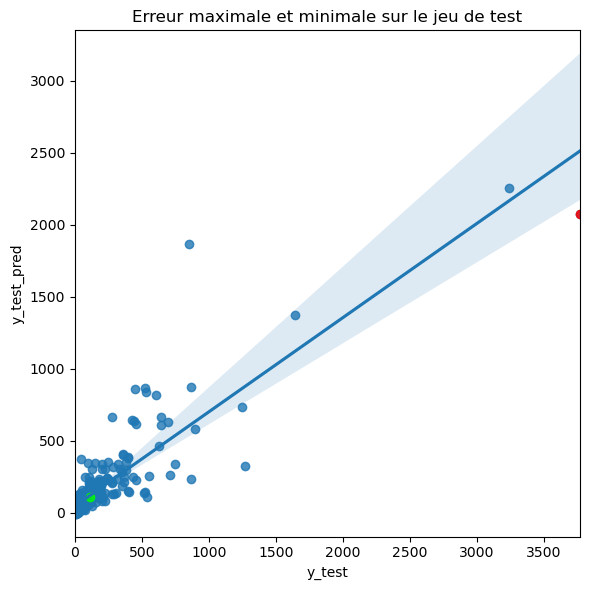

In [125]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_error_max, x=df_error_max['y_test'], y=df_error_max['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_error_min, x=df_error_min['y_test'], y=df_error_min['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur maximale et minimale sur le jeu de test')
    
plt.tight_layout() 
plt.show()


In [126]:
# Position de l'éntrée associée au erreur maximal dans le test set
X_test_item = [i for i,index in enumerate(X_test_stdS.index.tolist()) if index == df_error_max.index]

# Importance des variables erreur max
valeurs= np.abs(shap_values_exp[X_test_item]).mean(0)
error_max_feature_importance = pd.DataFrame(list(zip(X_test_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_max_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_max_feature_importance = error_max_feature_importance.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur maximale
shap.plots.force(GBRopti_expl.expected_value, shap_values_exp[X_test_item], feature_names=featureNames, out_names="Emissions de CO2")


In [127]:
# Position de l'éntrée associée au erreur minimale dans le test set
X_test_item = [i for i,index in enumerate(X_test_stdS.index.tolist()) if index == df_error_min.index]

# Importance des variables erreur min
valeurs= np.abs(shap_values_exp[X_test_item]).mean(0)
error_min_feature_importance = pd.DataFrame(list(zip(X_test_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_min_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_min_feature_importance =error_min_feature_importance.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur minimale
shap.plots.force(GBRopti_expl.expected_value, shap_values_exp[X_test_item], feature_names=featureNames, out_names="Emissions de CO2")


<a id='erreur_sup99'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 supérieur à celui du 99% des prédictions restantes**</span></span>

In [128]:
# Erreur sur le jeu de test de plus de 99%
df_erreur_sup99 = df_error_test[df_error_test['erreur_abs'] > df_error_test['erreur_abs'].quantile(0.99)]
df_erreur_sup99=df_erreur_sup99.sort_values(by=['erreur_abs'], ascending=[False])


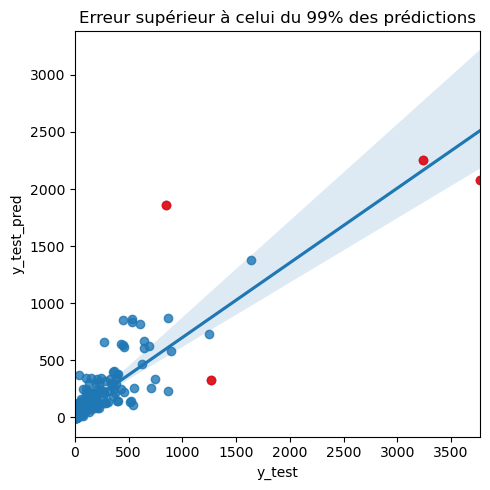

In [129]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup99, x=df_erreur_sup99['y_test'], y=df_erreur_sup99['y_test_pred'], color ='red', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur supérieur à celui du 99% des prédictions')
    
plt.tight_layout() 
plt.show()


In [130]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 99% des prédictions restantes

print("Il y a " + str(df_erreur_sup99.shape[0]) + " propriétées dont l'erreur de prédiction des emissions de CO2 est supérieur à celui du 99% des prédictions restantes. Il s'agit de: \n")

prop_99_error = index_BEB_2016.iloc[df_erreur_sup99.index.to_list(), :]
OSEBuildingID_prop_99_error = prop_99_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_99_error)]


Il y a 4 propriétées dont l'erreur de prédiction des emissions de CO2 est supérieur à celui du 99% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
334             470      2016  NonResidential          Laboratory   
809           19900      2016  NonResidential          Laboratory   
1690          23113      2016  NonResidential      Medical Office   
2325          25251      2016          Campus          University   

                 PropertyName            Address     City State  ZipCode  \
334         401 Terry (ID470)    401 TERRY AVE N  Seattle    WA  98109.0   
809         3000/3018 Western  3018 Western Ave.  Seattle    WA  98121.0   
1690           Central Campus   201 16th Ave. E.  Seattle    WA  98112.0   
2325  5th Avenue Master Meter    3307 3rd Ave. W  Seattle    WA  98119.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
334                     1983200200                    7   
809                     0695000090                    7   
1690                    3117000005                    3   
2325                    8900000555                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
334              LAKE UNION  47.62254 -122.33753       2003   
809                DOWNTOWN  47.61763 -122.35507       1926   
1690                   EAST  47.62014 -122.31228       1964   
2325  MAGNOLIA / QUEEN ANNE  47.65019 -122.36173       1945   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
334                 1.0               4            241159              111793   
809                 0.0               4             49249                   0   
1690                1.0               3            591981                   0   
2325               14.0               2            537000                   0   

      PropertyGFABuilding(s)  \
334                   129366   
809                    49249   
1690                  591981   
2325                  537000   

                              ListOfAllPropertyUseTypes  \
334                                          Laboratory   
809                                  Laboratory, Office   
1690  Medical Office, Other/Specialty Hospital, Outp...   
2325                                 College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
334              Laboratory                   176171.0   
809              Laboratory                    40584.0   
1690         Medical Office                   520187.0   
2325     College/University                   533826.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
334                           NaN                              NaN   
809                        Office                           7165.0   
1690                      Parking                         282392.0   
2325                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
334                          NaN                             NaN   
809                          NaN                             NaN   
1690    Other/Specialty Hospital                         54159.0   
2325                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
334                       NaN              NaN        191.399994   
809                       NaN              NaN        696.700012   
1690                      NaN             60.0        173.399994   
2325                      NaN              NaN        169.699997   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
334           197.199997          442.799988            449.000000   
809           693.099976         1206.699951           1195.099976   
1690          175.699997          351.600006            351.000000   
2325          181.300003          266.799988            278.899994   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
334            33713876.0             34746128.0             

In [131]:

# Position des propriétés avec un erreur associé supérieur à celui du 99% des prédictions restantes

# Liste des indices concernées 
erreur_sup99_idx_list = df_erreur_sup99.index.tolist()
X_test_stdS_idx = X_test_stdS.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_sup99_idx_list]


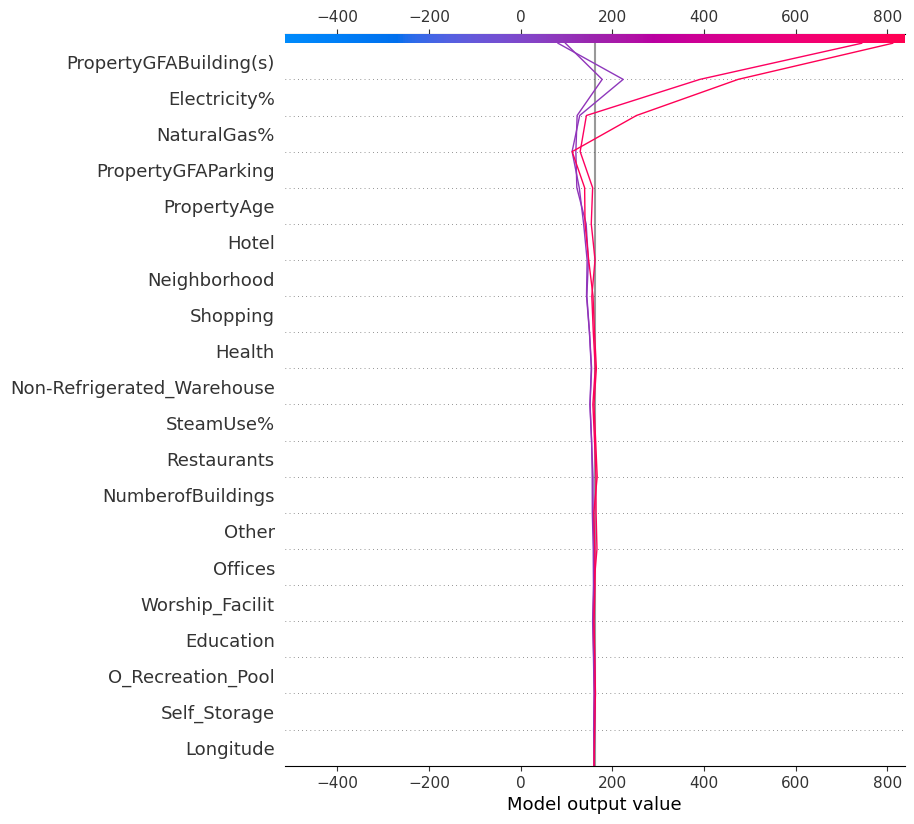

In [132]:

# Importance des variables error_sup99
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
error_sup99_feature_importance = pd.DataFrame(list(zip(X_test_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_sup99_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_sup99_feature_importance =error_sup99_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_sup95'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 supérieur à celui du 95% des prédictions restantes**</span></span>

In [133]:

#  erreur sur le jeu de test de plus de 95%
df_erreur_sup95 = df_error_test[df_error_test['erreur_abs']> df_error_test['erreur_abs'].quantile(0.95)]
df_erreur_sup95=df_erreur_sup95.sort_values(by=['erreur_abs'], ascending=[False])


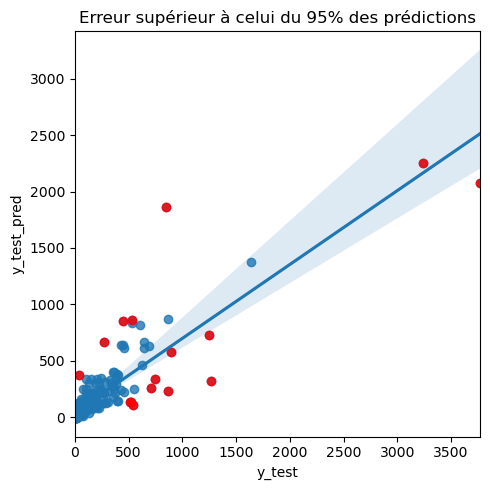

In [134]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup95, x=df_erreur_sup95['y_test'], y=df_erreur_sup95['y_test_pred'], color ='red', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur supérieur à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [135]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_sup95.shape[0]) + " propriétées dont l'erreur de prédiction de leur emission de CO2 est supérieur à celui du 95% des prédictions restantes. Il s'agit de: \n")

prop_95_error = index_BEB_2016.iloc[df_erreur_sup95.index.to_list(), :]
OSEBuildingID_prop_95_error = prop_95_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_95_error)]


Il y a 16 propriétées dont l'erreur de prédiction de leur emission de CO2 est supérieur à celui du 95% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
137             225      2016  SPS-District K-12         K-12 School   
155             245      2016     NonResidential               Other   
158             249      2016     NonResidential               Other   
162             261      2016             Campus        Large Office   
292             422      2016     NonResidential        Large Office   
334             470      2016     NonResidential          Laboratory   
359             507      2016     NonResidential           Warehouse   
545             738      2016     NonResidential               Other   
809           19900      2016     NonResidential          Laboratory   
1279          21435      2016     NonResidential               Other   
1690          23113      2016     NonResidential      Medical Office   
2314          25222      2016     NonResidential  Mixed Use Property   
2325          25251      2016             Campus          University   
2380          25452      2016     NonResidential  Mixed Use Property   
2522          25955      2016     NonResidential               Other   
3158          48287      2016     NonResidential        Large Office   

                                          PropertyName  \
137                                Denny/Sealth Campus   
155                                        CenturyLink   
158                                       Safeco Field   
162                                         South Park   
292                                   Two Union Square   
334                                  401 Terry (ID470)   
359                              Skyline-East Marginal   
545                               UW Benjamin Hall IRB   
809                                  3000/3018 Western   
1279                                      space needle   
1690                                    Central Campus   
2314                                           Olive 8   
2325                           5th Avenue Master Meter   
2380                            Chandler's Cove - SEDO   
2522                               Seattle Tennis Club   
3158  Central Link Operations and Maintenance Facility   

                               Address     City State  ZipCode  \
137   2601 SW Kenyon / 2600 SW Thistle  Seattle    WA  98126.0   
155          800 Occidental Ave. South  Seattle    WA  98134.0   
158            1250 First Avenue South  Seattle    WA  98134.0   
162                     1420 S Trenton  Seattle    WA  98108.0   
292                      601 Union St.  Seattle    WA  98101.0   
334                    401 TERRY AVE N  Seattle    WA  98109.0   
359              4401 E Marginal Way S  Seattle    WA  98134.0   
545             616 NE Northlake Place  Seattle    WA  98105.0   
809                  3018 Western Ave.  Seattle    WA  98121.0   
1279                 400 broard street  Seattle    WA  98109.0   
1690                  201 16th Ave. E.  Seattle    WA  98112.0   
2314                     737 Olive Way  Seattle    WA  98101.0   
2325                   3307 3rd Ave. W  Seattle    WA  98119.0   
2380              901 Fairview Ave. N.  Seattle    WA  98109.0   
2522               922 McGilvra Blvd E  Seattle    WA  98112.0   
3158            3407 Airport Way South  Seattle    WA  98134.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
137                     3624039032                    1   
155                     7666204876                    2   
158                     7666206483                    2   
162                     7883608601                    1   
292                     1976700125                    7   
334                     1983200200                    7   
359                     1824049063                    2   
545                     4207401365                    4   
809                     0695000090                    7   
1279                    1985200495                    7   
1690                  

In [136]:

# Position des propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

# Liste des indices concernées 
erreur_sup95_idx_list = df_erreur_sup95.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_sup95_idx_list]


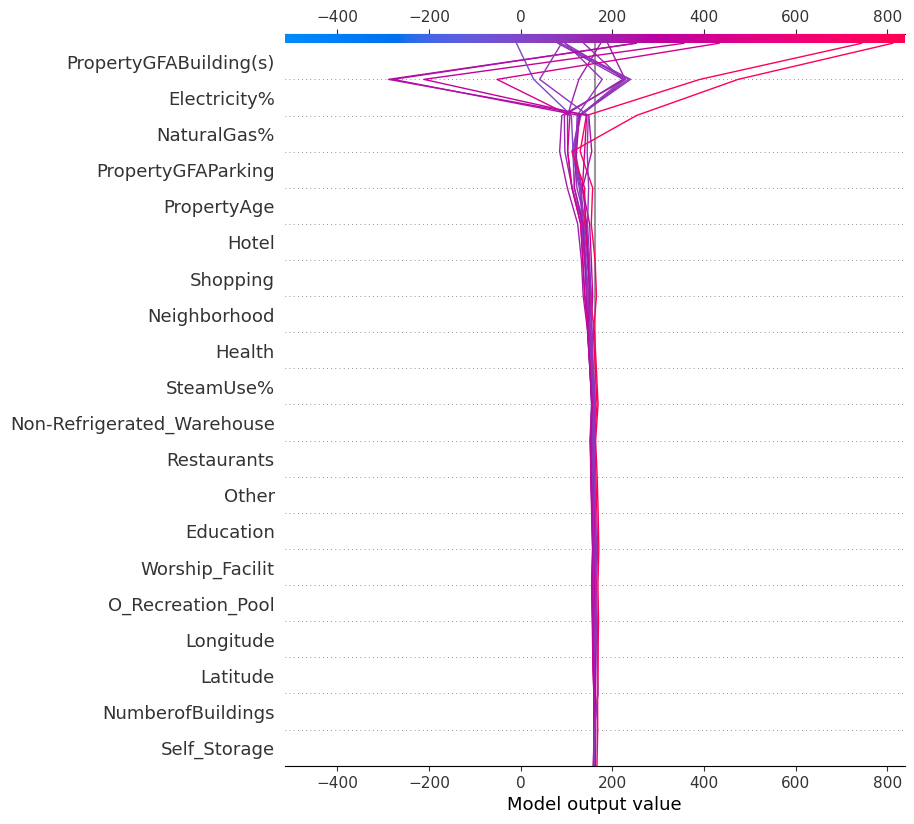

In [137]:

# Importance des variables error_sup95
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
error_sup95_feature_importance = pd.DataFrame(list(zip(X_test_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_sup95_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_sup95_feature_importance =error_sup95_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_inf5'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 inférieur à celui du 95% des prédictions restantes**</span></span>

In [138]:

#  erreur sur le jeu de test de moins de 5%
df_erreur_inf5 = df_error_test[df_error_test['erreur_abs'] < df_error_test['erreur_abs'].quantile(0.5)]


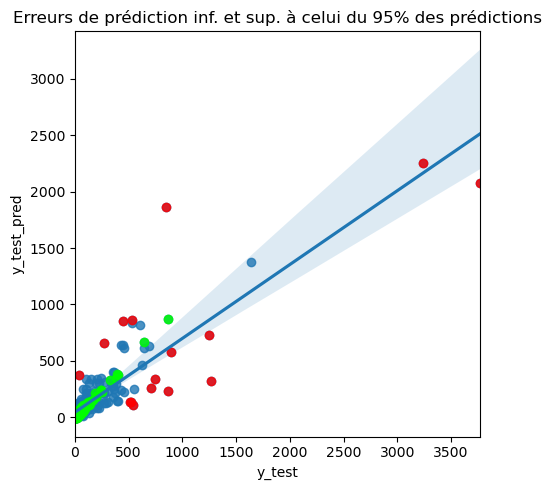

In [139]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup95, x=df_erreur_sup95['y_test'], y=df_erreur_sup95['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_erreur_inf5, x=df_erreur_inf5['y_test'], y=df_erreur_inf5['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreurs de prédiction inf. et sup. à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [140]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_inf5.shape[0]) + " propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf95_error = index_BEB_2016.iloc[df_erreur_inf5.index.to_list(), :]
OSEBuildingID_prop_inf95_error = prop_inf95_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf95_error)]


Il y a 157 propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear        BuildingType  \
0                 1      2016      NonResidential   
8                12      2016      NonResidential   
84              121      2016      NonResidential   
105             172      2016              Campus   
125             200      2016      NonResidential   
...             ...       ...                 ...   
3206          49784      2016      NonResidential   
3273          49966      2016      NonResidential   
3290          49998      2016      NonResidential   
3321          50038      2016      NonResidential   
3360          50196      2016  Nonresidential COS   

              PrimaryPropertyType                              PropertyName  \
0                           Hotel                      Mayflower park hotel   
8                           Hotel                      311wh-Pioneer Square   
84    Small- and Mid-Sized Office                             2100 Building   
105                    University                          SSCC MAIN CAMPUS   
125                         Other                       Verity Credit Union   
...                           ...                                       ...   
3206  Small- and Mid-Sized Office                            Bullitt Center   
3273                        Other    Smilow Rainier Vista Boys & Girls Club   
3290        Self-Storage Facility  West Coast Self-Storage of Columbia City   
3321           Mixed Use Property             Salmon Bay Marine Center West   
3360           Mixed Use Property                Northgate Community Center   

                                Address     City State  ZipCode  \
0                         405 Olive way  Seattle    WA  98101.0   
8                           612 2nd Ave  Seattle    WA  98104.0   
84                      2100 24th Ave S  Seattle    WA  98144.0   
105                    6000 16th Ave SW  Seattle    WA  98106.0   
125               11027 Meridian N #102  Seattle    WA  98133.0   
...                                 ...      ...   ...      ...   
3206                1501 E. Madison St.  Seattle    WA  98122.0   
3273  4520 Martin Luther King Jr. Way S  Seattle    WA  98108.0   
3290                 3736 Rainier Ave S  Seattle    WA  98144.0   
3321               2360 W Commodore Way  Seattle    WA  98199.0   
3360                   10510 5th Ave NE  Seattle    WA      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
8                       0939000080                    7   
84                      1498303116                    3   
105                     6171900005                    1   
125                     3026049024                    5   
...                            ...                  ...   
3206                    7234600195                    3   
3273                    6056110050                    2   
3290                    3357400211                    2   
3321                    2771605298                    7   
3360                    2926049431                    5   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
8                  DOWNTOWN  47.60294 -122.33263       1904   
84                SOUTHEAST  47.58408 -122.30125       2003   
105                DELRIDGE  47.54700 -122.35307       1970   
125               NORTHWEST  47.70956 -122.33450       1996   
...                     ...       ...        ...        ...   
3206                CENTRAL  47.61432 -122.31257       2013   
3273              SOUTHEAST  47.56260 -122.29396       2009   
3290              SOUTHEAST  47.57054 -122.29139       2014   
3321  MAGNOLIA / QUEEN ANNE  47.66144 -122.38723       2014   
3360                  NORTH  47.70541 -122.32232       2005   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434           

In [141]:

# Position des propriétés avec un erreur associé inférieur à celui du 90% des prédictions restantes

# Liste des indices concernées 
erreur_inf95_idx_list = df_erreur_inf5.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_inf95_idx_list]


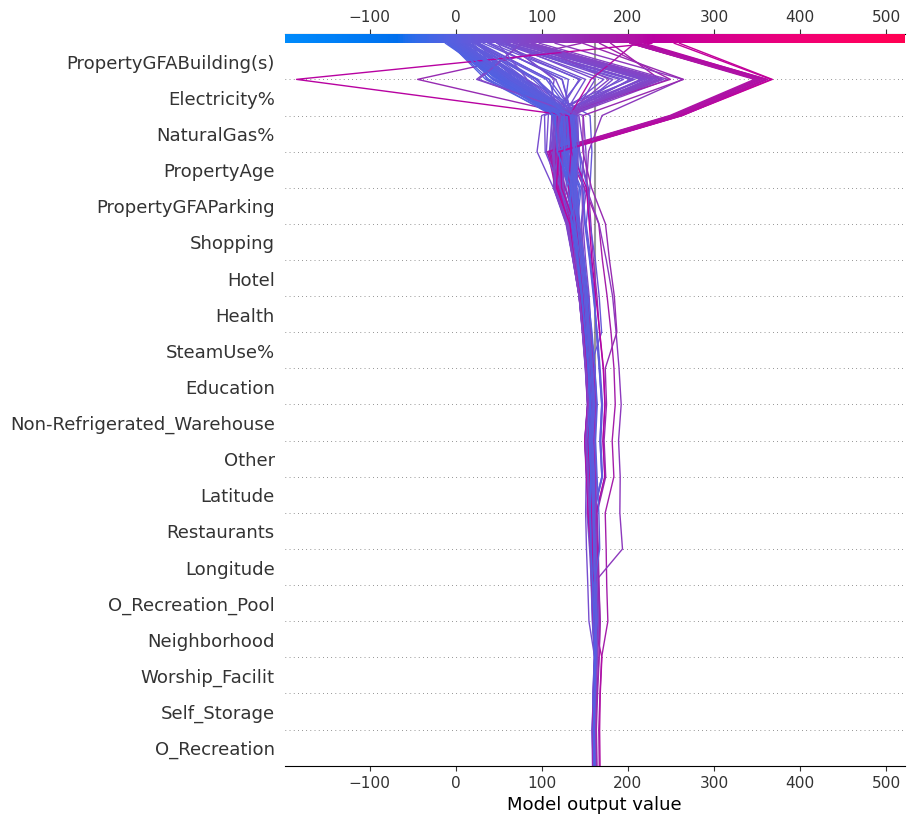

In [142]:

# Importance des variables erreur_inf95
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
erreur_inf95_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf95_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf95_feature_importance =erreur_inf95_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_inf1'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 inférieur à celui du 99% des prédictions restantes**</span></span>

In [143]:

#  erreur sur le jeu de test de moins de 1%
df_erreur_inf1 = df_error_test[df_error_test['erreur_abs'] < df_error_test['erreur_abs'].quantile(0.01)]


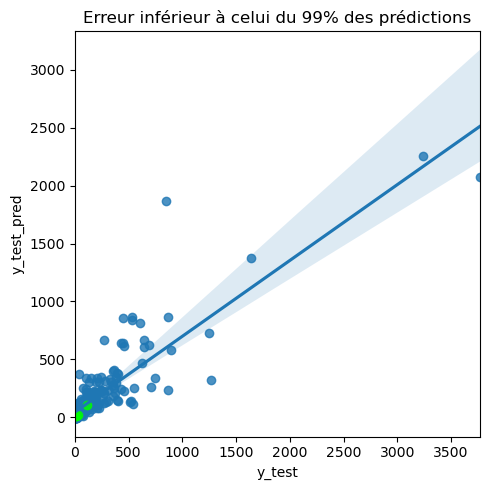

In [144]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_inf1, x=df_erreur_inf1['y_test'], y=df_erreur_inf1['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur inférieur à celui du 99% des prédictions')
    
plt.tight_layout() 
plt.show()


In [145]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("Il y a " + str(df_erreur_inf1.shape[0]) + " propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf99_error = index_BEB_2016.iloc[df_erreur_inf1.index.to_list(), :]
OSEBuildingID_prop_inf99_error = prop_inf99_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf99_error)]


Il y a 4 propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
362             514      2016  NonResidential                 Retail Store   
499             680      2016  NonResidential  Small- and Mid-Sized Office   
1975          24026      2016  NonResidential        Self-Storage Facility   
3163          49697      2016  NonResidential           Mixed Use Property   

                               PropertyName                    Address  \
362                W000252-NORTH SEATTLE WA  12525 AURORA AVENUE NORTH   
499                            RDA Building          800 Maynard Ave S   
1975  U-Haul Moving & Storage of SE Seattle           6401 Mlk Jr Wy S   
3163                    Prudential Building          114 Alaskan Way S   

         City State  ZipCode TaxParcelIdentificationNumber  \
362   Seattle    WA  98133.0                    1926049033   
499   Seattle    WA  98134.0                    8592900345   
1975  Seattle    WA  98118.0                    3333001690   
3163  Seattle    WA  98104.0                    5247800025   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
362                     5         NORTHWEST  47.72053 -122.34739       1997   
499                     2  GREATER DUWAMISH  47.59554 -122.32471       1925   
1975                    2  GREATER DUWAMISH  47.54514 -122.28596       1955   
3163                    7          DOWNTOWN  47.60121 -122.33518       1902   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
362                 1.0               1            131387                   0   
499                 1.0               4             72000                   0   
1975                1.0               1             23100                   0   
3163                1.0               6             74211                   0   

      PropertyGFABuilding(s)             ListOfAllPropertyUseTypes  \
362                   131387                          Retail Store   
499                    72000                                Office   
1975                   23100                 Self-Storage Facility   
3163                   74211  Multifamily Housing, Office, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
362            Retail Store                   107931.0   
499                  Office                    72000.0   
1975  Self-Storage Facility                    23250.0   
3163                 Office                    33279.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
362                           NaN                              NaN   
499                           NaN                              NaN   
1975                          NaN                              NaN   
3163          Multifamily Housing                          29878.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
362                          NaN                             NaN   
499                          NaN                             NaN   
1975                         NaN                             NaN   
3163                     Parking                          8421.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
362                       NaN             72.0         81.300003   
499                       NaN             89.0         37.900002   
1975                      NaN              NaN         37.099998   
3163                      NaN             97.0         21.500000   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
362            82.900002          234.500000            234.000000   
499            38.000000          116.199997            116.400002   
1975           38.400002          101.400002            105.400002   
3163           22.799999           67.500000             71.500000   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
362           8773058.000            

In [146]:

# Position des propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
# Liste des indices concernées 
erreur_inf99_idx_list = df_erreur_inf1.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_inf99_idx_list]


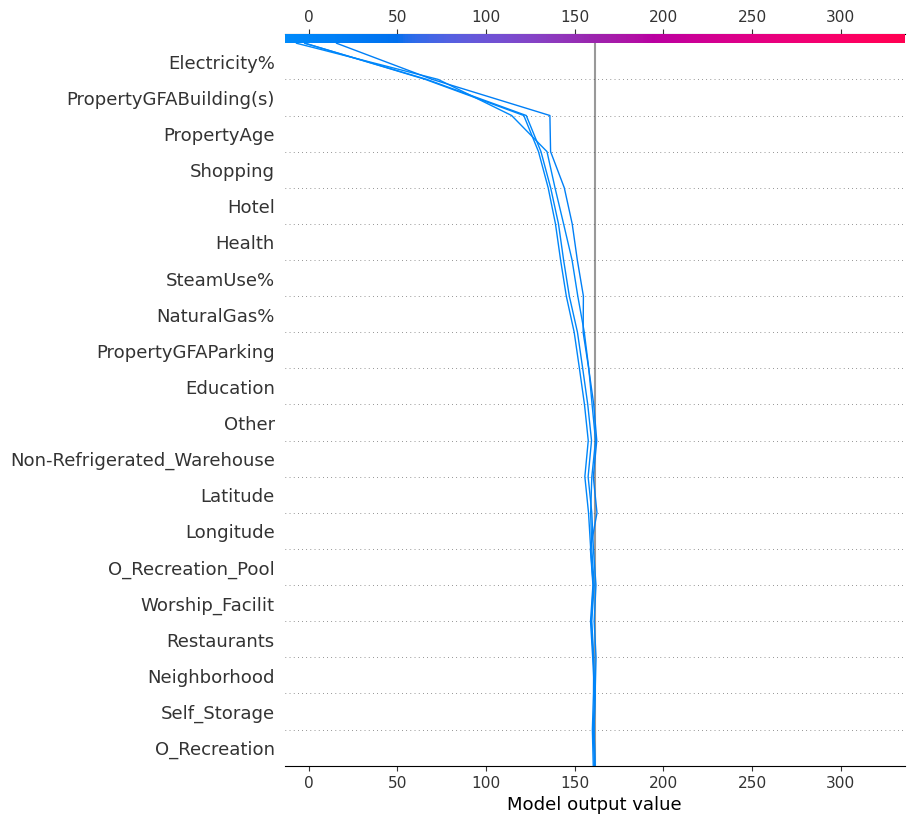

In [147]:

# Importance des variables erreur_inf99
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
erreur_inf99_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf99_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf99_feature_importance =erreur_inf99_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='errors_feature_importance'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables associées aux erreurs plus/moins importants </span>


In [148]:

#----------------------------------------------------------
#Tableau synthèse differences en l'importance des variables
#----------------------------------------------------------

global_feature_imp_cls = global_feature_importance.reset_index().copy()
global_feature_imp_cls = global_feature_imp_cls.rename(columns={"index": "Global"}).drop(columns='feature_importance_valeurs').head(10)
global_feature_imp_cls["Global"] = global_feature_imp_cls["Global"]+1

error_max_feature_imp_cls = error_max_feature_importance.reset_index().copy()
error_max_feature_imp_cls = error_max_feature_imp_cls.rename(columns={"index": "ErreurMax"}).drop(columns='feature_importance_valeurs').head(10)
error_max_feature_imp_cls["ErreurMax"] = error_max_feature_imp_cls["ErreurMax"]+1

error_min_feature_imp_cls = error_min_feature_importance.reset_index().copy()
error_min_feature_imp_cls = error_min_feature_imp_cls.rename(columns={"index": "ErreurMin"}).drop(columns='feature_importance_valeurs').head(10)
error_min_feature_imp_cls["ErreurMin"] = error_min_feature_imp_cls["ErreurMin"]+1

error_sup95_feature_imp_cls = error_sup95_feature_importance.reset_index().copy()
error_sup95_feature_imp_cls = error_sup95_feature_imp_cls.rename(columns={"index": "Error_sup95"}).drop(columns='feature_importance_valeurs').head(10)
error_sup95_feature_imp_cls["Error_sup95"] = error_sup95_feature_imp_cls["Error_sup95"]+1

erreur_inf95_feature_imp_cls = erreur_inf95_feature_importance.reset_index().copy()
erreur_inf95_feature_imp_cls = erreur_inf95_feature_imp_cls.rename(columns={"index": "Error_inf90"}).drop(columns='feature_importance_valeurs').head(10)
erreur_inf95_feature_imp_cls["Error_inf90"] = erreur_inf95_feature_imp_cls["Error_inf90"]+1

df_features_importance_classement = reduce(lambda x,y: pd.merge(x,y, on='Variable', how='outer'),[error_max_feature_imp_cls, error_sup95_feature_imp_cls,\
                                                                                                  global_feature_imp_cls,\
                                                                                                  erreur_inf95_feature_imp_cls ,error_min_feature_imp_cls])

context = df_features_importance_classement.columns.tolist()
context.remove('Variable')


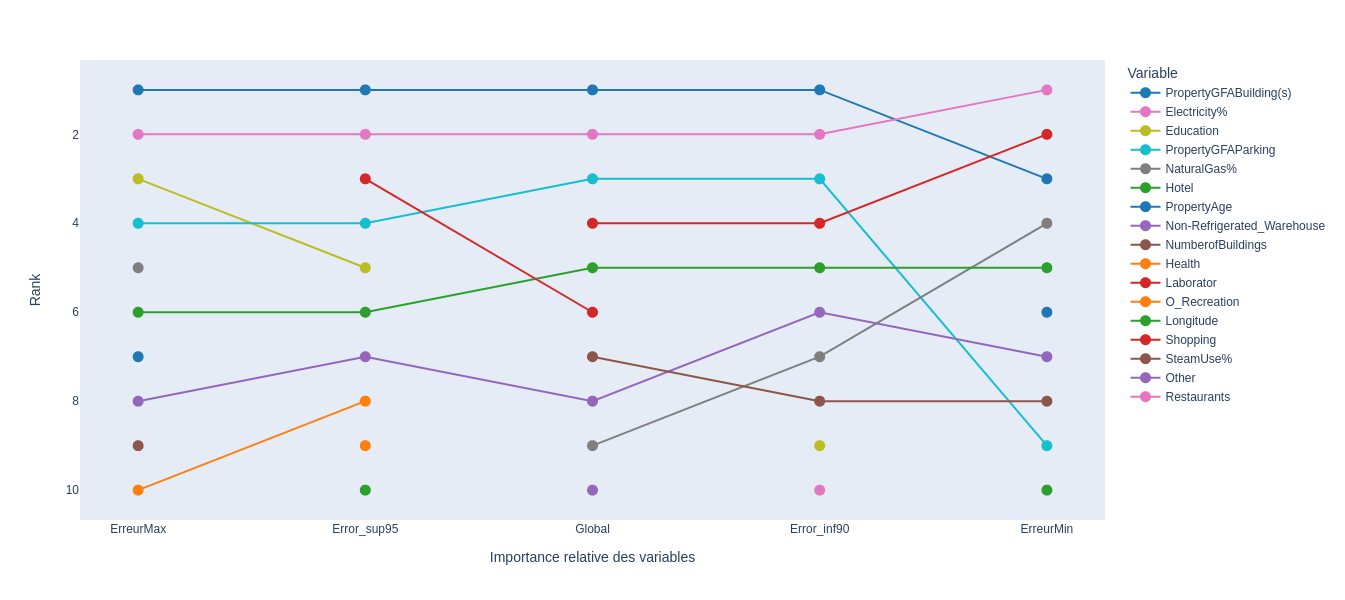

In [149]:

#----------------------------------------------
#Visualisation de l'évolution de l'attractivité
#----------------------------------------------

##
#Data
##
df_featImport_classement = pd.melt(frame = df_features_importance_classement, id_vars=["Variable"], value_vars = (context),\
                                   var_name="context", value_name="Importance")  
df_featImport_classement.head()


##
#Graph
##

#extract color palette, the palette can be changed
list_variables = list(set(df_featImport_classement['Variable']))
pal = list(sns.color_palette(n_colors=len(list_variables)).as_hex())
dict_color = dict(zip(list_variables, pal))

fig = px.line(df_featImport_classement, x = 'context', y = 'Importance',color = 'Variable', color_discrete_map= dict_color, markers=True, width=1000, height=600)
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(autorange='reversed', title='Rank',visible=True, showticklabels=True)
fig.update_xaxes(title='Importance relative des variables', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False) )

fig.show()


Les principales différences entre les prédictions à forte erreur et les prédictions à faible erreur sont l'impact plus important des variables Éducation et Zone de laboratoire.